Start date: 5/20/2020

#### Importing objects and functions

In [699]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.table import Table
from astropy.table import QTable, Table, Column
from astropy import units as u
from astropy.io import ascii
from scipy.optimize import curve_fit

### TO-DO for Tuesday(5/26/2020):
 > ✔Plot histograms for all WF50, WP50, & WP20\
 > ✔Plot scatter-plots with each of those and see the relationship between them

#### GBT MaNGA data

In [700]:
mangaHI = Table.read("input/mangaHIall.fits", format="fits")

In [701]:
wp20_manga = mangaHI["WP20"]
wf50_manga = mangaHI["WF50"]
wp50_manga = mangaHI["WP50"]

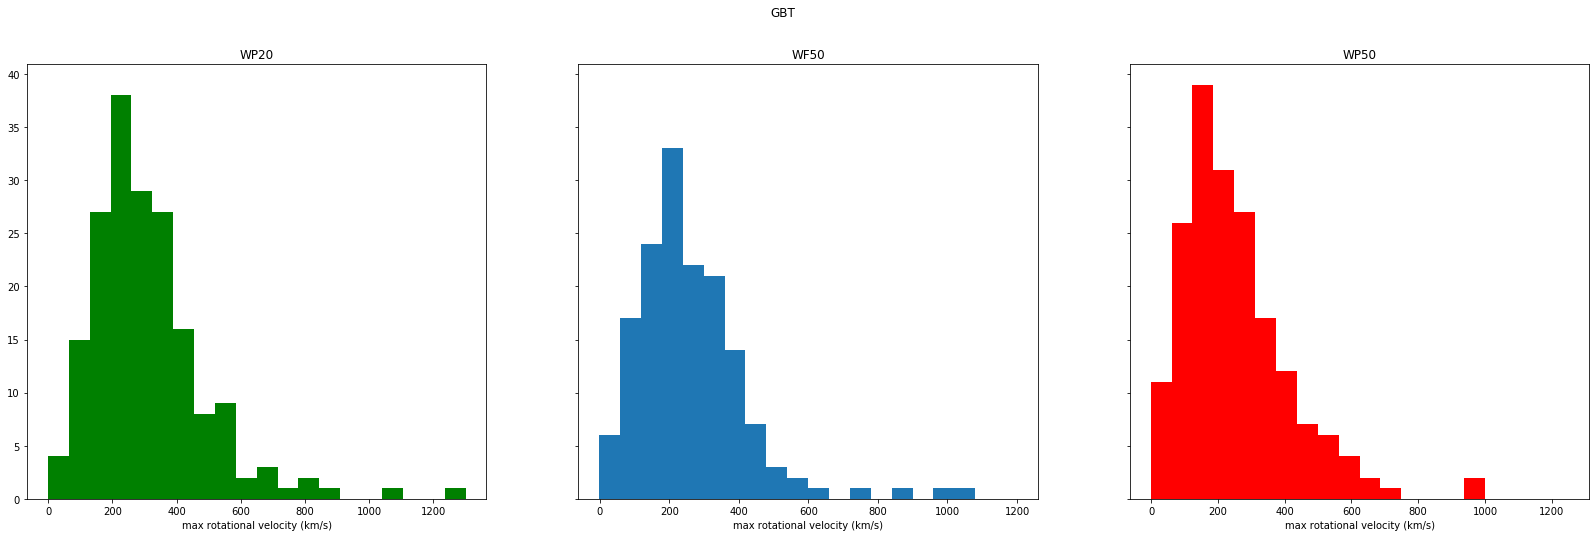

In [702]:
#Distribution of WF50, WP20, & WP50 velocities in GBT data

fig, axs = plt.subplots(1,3, sharey=True, figsize=(28,8))
plt.suptitle("GBT")
axs[0].hist(wp20_manga, bins=20, range = (-1, 1300), color='green')
axs[0].set_title("WP20")
axs[1].hist(wf50_manga, bins=20, range = (-1, 1200))
axs[1].set_title("WF50")
axs[2].hist(wp50_manga, bins=20, range=(-1,1250), color = 'red')
axs[2].set_title("WP50")
for ax in axs.flat:
    ax.set(xlabel='max rotational velocity (km/s)')
plt.savefig('plots/GBT_Vmax-distritbution.svg', dpi=500, facecolor='w', edgecolor='w',
        orientation='portrait', format='svg', pad_inches=0.1)
plt.show()

#### ALFALFA data

In [703]:
alfaHI = Table.read("input/manga_dr15_alfalfa.fits", format="fits")

In [704]:
wp20_alfa = alfaHI["WP20"]
wf50_alfa = alfaHI["WF50"]

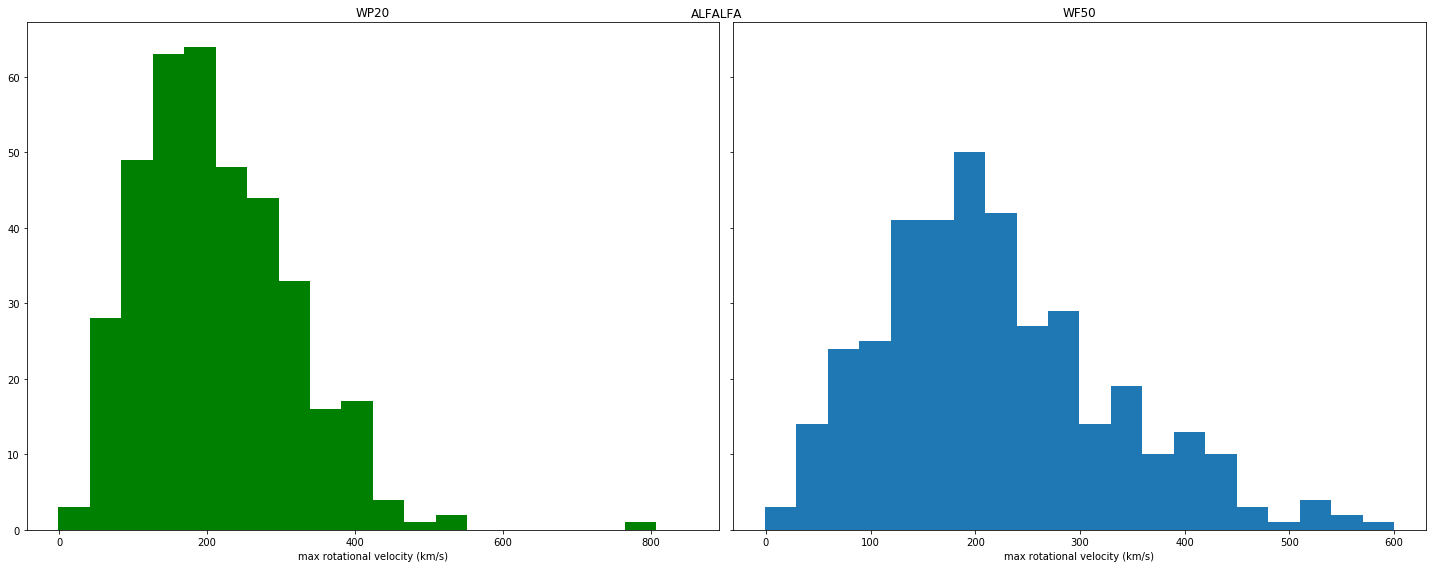

In [705]:
#Distribution of WF50 & WP20 velocities in ALFALFA data

fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True, figsize = (20,8))
plt.suptitle("ALFALFA")
axs[0].hist(wp20_alfa, bins=20, range = (-1, 850), color='green')
axs[0].set_title("WP20")
axs[1].hist(wf50_alfa, bins=20, range = (-1, 600))
axs[1].set_title("WF50")
for ax in axs.flat:
    ax.set(xlabel='max rotational velocity (km/s)')
plt.savefig('plots/ALFALFA_Vmax-distritbution.svg', dpi=500, facecolor='w', edgecolor='w',
        orientation='portrait', format='svg', pad_inches=0.1)
plt.show()

#### Plots of the WF50, WP50, & WP20 velocities to understand the relationship between them

In [706]:
#WF50 vs WP20 plot for ALFALFA data to understand the relationship between the two

plt.plot(wp20_alfa, wf50_alfa, ".", label = 'ALFALFA')
plt.xlabel("WP20 (km/s)")
plt.xlim(xmin=0)
plt.ylabel("WF50 (km/s)")
plt.ylim(ymin=0)
plt.plot([0,1000], [0, 1000])
plt.legend()
plt.savefig('plots/ALFALFA_WF50-WP20.svg', dpi=500, facecolor='w', edgecolor='w',
        orientation='portrait', format='svg', pad_inches=0.1)
plt.close()

In [707]:
#WF50 vs WP50 plot for GBT data to understand the relationship between the two

plt.plot(wp50_manga, wf50_manga, ".", label = 'GBT', color = 'green')
plt.xlabel("WP50 (km/s)")
plt.ylabel("WF50 (km/s)")
plt.xlim(xmin=0)
plt.ylim(ymin=0)
plt.plot([0,1000], [0, 1000], color='red')
plt.legend()
plt.savefig('plots/GBT_WF50-WP50.svg', dpi=500, facecolor='w', edgecolor='w',
        orientation='portrait', format='svg', pad_inches=0.1)
plt.close()

In [708]:
#WP50 vs WP20 plot for GBT data to understand the relationship between the two

plt.plot(wp20_manga, wp50_manga, ".", label = 'GBT', color="green")
plt.xlabel("WP20 (km/s)")
plt.ylabel("WP50 (km/s)")
plt.xlim(xmin=0)
plt.ylim(ymin=0)
plt.plot([0,1000], [0, 1000])
plt.legend()
plt.savefig('plots/GBT_WP50-WP20.svg', dpi=500, facecolor='w', edgecolor='w',
        orientation='portrait', format='svg', pad_inches=0.1)
plt.close()

### TO-DO for Thursday (5/28/2020)
> ✔Relationship between WF50 and HI mass - Easy stuff\
> ✔Relationship between WF50 and stellar mass - crosslist match plateifu id and add a new column and then plot

#### Relationship between log(WF50) and log(HI-mass) of all GBT and ALFALFA data

In [709]:
alfaHI_full =  ascii.read('input/alfalfa_full.csv', format='csv')
wf50_alfaHI_full = alfaHI_full['W50']
HImass_alfaHI_full = alfaHI_full['logMH']
HImass_manga = mangaHI["logMHI"]
HImass_alfa = alfaHI["LOGMHI"]

In [710]:
#log(WF50) vs log(HI-mass) plot to understand the relationship between the two

plt.semilogy(HImass_alfaHI_full, wf50_alfaHI_full, '*', label = 'All ALFALFA', color = 'lightgrey')
plt.semilogx(HImass_alfa, wf50_alfa, ".", label="ALFALFA")
plt.semilogy(HImass_manga, wf50_manga, ".", label="GBT", color = 'red')
plt.xlabel("log_HI-mass(MSolar)")
plt.ylabel("log_WF50 (km/s)")
plt.xlim(xmin=3,xmax=11.5)
plt.title('log(WF50) (km/s) vs log(HI-mass) (solar mass)')
plt.legend()
plt.savefig('plots/log_WF50-log_HImass.svg', dpi=500, facecolor='w', edgecolor='w',
        orientation='portrait', format='svg', pad_inches=0.1)
plt.close()

#### Relationship between log(WF50) and log(MStar) of all GBT and ALFALFA data


In [711]:
table2 = Table.read("input/Pipe3D-master_file_vflag_10_smooth2p27_N2O2_noWords.txt", format="ascii.commented_header")

##### GBT

In [712]:
#SPLITS PLATE-IFU into two lists Plate & IFU and adds the values into two separate columns in mangaHI table while removing the Plate-IFU column

plate_manga = []
ifu_manga = []
for i in range(len(mangaHI)):
    _plate, _ifu = mangaHI['plateifu'][i].split("-")
    plate_manga.append(int(_plate))
    ifu_manga.append(int(_ifu))
plateManga_column = Column(np.asarray(plate_manga, dtype=np.int32, order='F'), name='Plate')
ifuManga_column = Column(np.asarray(ifu_manga, dtype=np.int32, order='F'), name='IFU')
mangaHI.remove_column('plateifu')
mangaHI.add_column(plateManga_column,index=0)
mangaHI.add_column(ifuManga_column,index=1)

In [713]:
#Cross-matches Plate and IFU numbers and adds stellar mass of the matching rows into a new column in the mangaHI table

stellarMass_manga = []
for i in range(len(mangaHI)):
    match = False
    for j in range(len(table2)):
        if (mangaHI['Plate'][i], mangaHI['IFU'][i]) == (table2['MaNGA_plate'][j], table2['MaNGA_IFU'][j]):
            # add stellar mass
            stellarMass_manga.append(table2['NSA_Mstar'][j])
            match = True
            break
    if match is False:
        stellarMass_manga.append(-999.0)

stellarMass_Manga_column = Column(np.asarray(stellarMass_manga, dtype = np.float64, order = 'F'), name = 'Stellar Mass')
stellarMass_Manga_column
mangaHI.add_column(stellarMass_Manga_column, index = 13)

In [714]:
mangaHI.write('out_txt/MaNGA_HI_with_MStar.txt', format='ascii.commented_header', overwrite = True)

##### ALFALFA 

In [715]:
#SPLITS PLATE-IFU into two lists Plate & IFU and adds the values into two separate columns in alfaHI table while removing the Plate-IFU column

plate_alfa=[]
ifu_alfa=[]
for i in range(len(alfaHI)):
    _plateAlfa, _ifuAlfa = alfaHI['PLATEIFU'][i].split('-')
    plate_alfa.append(_plateAlfa)
    ifu_alfa.append(_ifuAlfa)
plateAlfa_col = Column(np.asarray(plate_alfa, dtype=np.int32, order='F'), name='Plate')
ifuAlfa_col = Column(np.asarray(ifu_alfa, dtype=np.int32, order='F'), name='IFU')
alfaHI.remove_column('PLATEIFU')
alfaHI.add_column(plateAlfa_col,index=0)
alfaHI.add_column(ifuAlfa_col,index=1) 

In [716]:
#Cross-matches Plate and IFU numbers and adds stellar mass of the matching rows into a new column in the alfaHI table

stellarMass_alfa = []
for i in range(len(alfaHI)):
    match = False
    for j in range(len(table2)):
        if (alfaHI['Plate'][i], alfaHI['IFU'][i]) == (table2['MaNGA_plate'][j], table2['MaNGA_IFU'][j]):
            # add stellar mass
            stellarMass_alfa.append(table2['NSA_Mstar'][j])
            match = True
            break
    if match is False:
        stellarMass.append(-999.0)

stellarMass_Alfa_column = Column(np.asarray(stellarMass_alfa, dtype = np.float64, order = 'F'), name = 'Stellar Mass')
stellarMass_Alfa_column
alfaHI.add_column(stellarMass_Alfa_column, index = 10)

In [717]:
stellarMass_manga = np.log10(mangaHI['Stellar Mass'])
stellarMass_alfa = np.log10(alfaHI['Stellar Mass'])

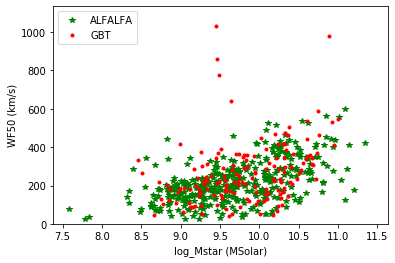

In [718]:
#WF50 vs log(MStar) plot to understand the relationship between the two

plt.plot(stellarMass_alfa, wf50_alfa, '*', label = "ALFALFA", color = 'green')
plt.plot(stellarMass_manga, wf50_manga,'.', label="GBT", color='red')
plt.xlabel('log_Mstar (MSolar)')
plt.ylabel('WF50 (km/s)')
plt.ylim(ymin=0)
plt.legend()
plt.savefig('plots/WF50-log_Mstar.svg', dpi=500, facecolor='w', edgecolor='w',
        orientation='portrait', format='svg', pad_inches=0.1)
plt.show()

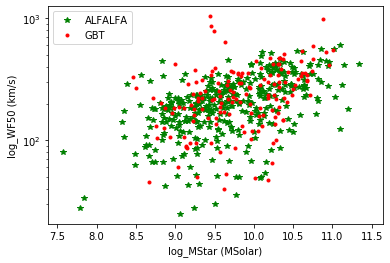

In [719]:
#log(WF50) vs log(MStar) plot to understand the relationship between the two

plt.semilogy(stellarMass_alfa, wf50_alfa, '*', label = "ALFALFA", color = 'green')
plt.semilogy(stellarMass_manga, wf50_manga,'.', label="GBT", color='red')
plt.xlabel('log_MStar (MSolar)')
plt.ylabel('log_WF50 (km/s)')
plt.legend()
plt.savefig('plots/log_WF50-log_Mstar.svg', dpi=500, facecolor='w', edgecolor='w', orientation='portrait', format='svg', pad_inches=0.1)
plt.show()

In [720]:
alfaHI.write('out_txt/alfaHI_with_MStar.txt', format='ascii.commented_header', overwrite = True)

### To-Do for Tuesday (06/02/2020):

 >✔Add the complete ALFALFA data to the HI mass plots\
 >✔Color the points depending on their environment: void - red (1.0), wall - black(0)

 

#### Separating voids and walls using their vflag values

##### GBT

In [721]:
#Adding vflag column to mangaHI table in the right corresponding positions by matching the Plate and IFU numbers of the galaxies

vflag_manga = []
for i in range(len(mangaHI)):
    for j in range(len(table2)):
        if (table2['MaNGA_plate'][j], table2['MaNGA_IFU'][j]) == (mangaHI['Plate'][i], mangaHI['IFU'][i]):
            vflag_manga.append(table2['vflag'][j])
vflag_manga_col = Column(np.asarray(vflag_manga, dtype = np.float64, order = 'F'), name = 'vflag')
#mangaHI.remove_column('vflag')
mangaHI.add_column(vflag_manga_col)

In [722]:
#Separating voids and walls using vflag values in mangaHI table. vflag of 1.0 are voids and vflag of 0.0 are walls. 
#When the vflag column has a value of 1.0 add the stellar mass of that row to the vflag column and do the same for walls

voids_manga = []
walls_manga = []

for i in range(len(mangaHI)):
    if mangaHI['vflag'][i] == 1.0:
        voids_manga.append(mangaHI['Stellar Mass'][i])
        walls_manga.append(-999.0)
    elif mangaHI['vflag'][i] == 0.0:
        walls_manga.append(mangaHI['Stellar Mass'][i])
        voids_manga.append(-999.0)
    else: 
        voids_manga.append(-999.0)
        walls_manga.append(-999.0)
        
voids_manga_col = Column(np.asarray(voids_manga, dtype = np.float64, order = 'F'), name = 'Voids')
walls_manga_col = Column(np.asarray(walls_manga, dtype = np.float64, order = 'F'), name = 'Walls')
#mangaHI.remove_column('Voids')
#mangaHI.remove_column('Walls')
mangaHI.add_column(voids_manga_col)
mangaHI.add_column(walls_manga_col)

##### ALFALFA

In [723]:
#Adding vflag column to alfaHI table in the right corresponding positions by matching the Plate and IFU numbers of the galaxies

vflag_alfa = []
for i in range(len(alfaHI)):
    for j in range(len(table2)):
        if (table2['MaNGA_plate'][j], table2['MaNGA_IFU'][j]) == (alfaHI['Plate'][i], alfaHI['IFU'][i]):
            vflag_alfa.append(table2['vflag'][j])
vflag_alfa_col = Column(np.asarray(vflag_alfa, dtype = np.float64, order = 'F'), name = 'vflag')
#alfaHI.remove_column('vflag')
alfaHI.add_column(vflag_alfa_col)

In [724]:
#Separating voids and walls using vflag values in alfaHI table. vflag of 1.0 are voids and vflag of 0.0 are walls. 
#When the vflag column has a value of 1.0 add the stellar mass of that row to the vflag column and do the same for walls

voids_alfa = []
walls_alfa = []

for i in range(len(alfaHI)):
    if alfaHI['vflag'][i] == 1.0:
        voids_alfa.append(alfaHI['Stellar Mass'][i])
        walls_alfa.append(-999.0)
    elif alfaHI['vflag'][i] == 0.0:
        walls_alfa.append(alfaHI['Stellar Mass'][i])
        voids_alfa.append(-999.0)
    else: 
        voids_alfa.append(-999.0)
        walls_alfa.append(-999.0)
        
voids_alfa_col = Column(np.asarray(voids_alfa, dtype = np.float64, order = 'F'), name = 'Voids')
walls_alfa_col = Column(np.asarray(walls_alfa, dtype = np.float64, order = 'F'), name = 'Walls')
#alfaHI.remove_column('Voids')
#alfaHI.remove_column('Walls')
alfaHI.add_column(voids_alfa_col)
alfaHI.add_column(walls_alfa_col)

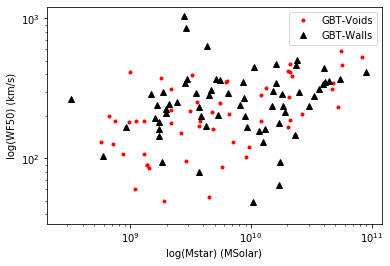

In [725]:
#Plot of log(WF50) vs log(MStar) for voids and walls of GBT data

plt.loglog(mangaHI['Voids'], wf50_manga, '.', label = 'GBT-Voids', color = 'red')
plt.loglog(mangaHI['Walls'], wf50_manga, '^', label = 'GBT-Walls', color = 'black')
plt.ylabel('log(WF50) (km/s)')
plt.xlabel('log(Mstar) (MSolar)')
plt.legend()
plt.savefig('plots/GBT_WF50-log_Mstar_VoidsAndWalls.svg', dpi=500, facecolor='w', edgecolor='w',
        orientation='portrait', format='svg', pad_inches=0.1)
plt.show()

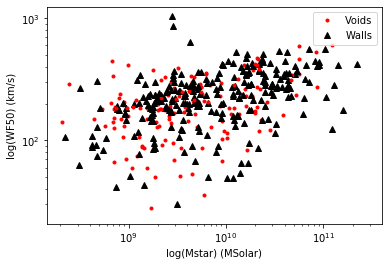

In [726]:
#Plot of log(WF50) vs log(MStar) for voids and walls of GBT & ALFALFA data

plt.loglog(alfaHI['Voids'], wf50_alfa, '.', label = 'Voids', color = 'red')
plt.loglog(alfaHI['Walls'], wf50_alfa, '^', label = 'Walls', color = 'black')
plt.loglog(mangaHI['Voids'], wf50_manga, '.', color = 'red')
plt.loglog(mangaHI['Walls'], wf50_manga, '^', color = 'black')
plt.ylabel('log(WF50) (km/s)')
plt.xlabel('log(Mstar) (MSolar)')
plt.legend()
plt.savefig('plots/WF50-log_Mstar_VoidsAndWalls.svg', dpi=500, facecolor='w', edgecolor='w',
        orientation='portrait', format='svg', pad_inches=0.1)
plt.show()

In [727]:
mangaHI.write('out_txt/MaNGA_with_voids&walls_classified.txt', format = 'ascii.commented_header', overwrite = True)

In [728]:
alfaHI.write('out_txt/ALFALFA_with_voids&walls_classified.txt', format = 'ascii.commented_header', overwrite = True)

### To-Do List (6/3/2020):
>&#10004;velocity correction to account for inclination angle\
>&#10004;finding the best-fit line for the relationship between rotational velocity and mass for voids and walls

##### HI-MASS Correction

In [729]:
#Add the ratio of semi-minor to semi-major axis (NSA_ba) column to the mangaHI table from table2 while matching Plate and IFU in mangaHI table

NSA_ba_manga = []
for i in range(len(mangaHI)):
    for j in range(len(table2)):
        if (table2['MaNGA_plate'][j], table2['MaNGA_IFU'][j]) == (mangaHI['Plate'][i], mangaHI['IFU'][i]):
            NSA_ba_manga.append(table2['NSA_ba'][j])
NSA_ba_manga_col = Column(np.asarray(NSA_ba_manga, dtype = np.float64, order = 'F'), name = 'NSA_ba')
mangaHI.add_column(NSA_ba_manga_col)

In [730]:
#Add the ratio of semi-minor to semi-major axis (NSA_ba) column to the mangaHI table from table2 while matching Plate and IFU in alfaHI table

NSA_ba_alfa = []
for i in range(len(alfaHI)):
    for j in range(len(table2)):
        if (table2['MaNGA_plate'][j], table2['MaNGA_IFU'][j]) == (alfaHI['Plate'][i], alfaHI['IFU'][i]):
            NSA_ba_alfa.append(table2['NSA_ba'][j])
NSA_ba_alfa_col = Column(np.asarray(NSA_ba_alfa, dtype = np.float64, order = 'F'), name = 'NSA_ba')
alfaHI.add_column(NSA_ba_alfa_col)

In [731]:
c_manga = 1/(mangaHI['NSA_ba'])**0.12
#Getting the HI-mass from log(HI-mass) in the table and adding a new column to the mangaHI table from GBT data,
manga_HI_mass = 10**(mangaHI['logMHI'])
mangaHI.add_column(Column(np.asarray(manga_HI_mass, dtype = np.float64, order = 'F'), name = 'MHI'), index=14)
MHI_corrected_manga = c_manga * mangaHI['MHI']
logMHI_corrected_manga = []
for i in range(len(MHI_corrected_manga)):
    if MHI_corrected_manga[i] == 0:
        logMHI_corrected_manga.append(-999.0)
    else:
        logMHI_corrected_manga.append(np.log10(MHI_corrected_manga[i]))

mangaHI.add_column(Column(np.asarray(MHI_corrected_manga, dtype=np.float64, order='F')), index = 16, name = 'MHI_corrected')
mangaHI.add_column(Column(np.asarray(logMHI_corrected_manga, dtype = np.float32, order = 'F')), index = 19, name = 'logMHI_corrected')

In [732]:
c_alfa = 1/(alfaHI['NSA_ba'])**0.12
#Getting the HI-mass from log(HI-mass) in the table and adding a new column to the alfaHI table from GBT data,
alfa_HI_mass = 10**(alfaHI['LOGMHI'])
alfaHI.add_column(Column(np.asarray(alfa_HI_mass, dtype = np.float64, order = 'F'), name = 'MHI'), index=14)
MHI_corrected_alfa = c_alfa * alfaHI['MHI']
LOGMHI_corrected_alfa = []
for i in range(len(MHI_corrected_alfa)):
    if MHI_corrected_alfa[i] == 0:
        LOGMHI_corrected_alfa.append(-999.0)
    else:
        LOGMHI_corrected_alfa.append(np.log10(MHI_corrected_alfa[i]))

alfaHI.add_column(Column(np.asarray(MHI_corrected_alfa, dtype=np.float64, order='F')), index = 16, name = 'MHI_corrected')
alfaHI.add_column(Column(np.asarray(LOGMHI_corrected_alfa, dtype = np.float32, order = 'F')), index = 19, name = 'logMHI_corrected')


#### VELOCITY CORRECTION (once this is done only use the corrected velocities)

In [733]:
#Cross-matches Plate and IFU numbers and adds NSA_redshift of the matching rows into a new column in the mangaHI table
manga_NSA_redshift = []
for i in range(len(mangaHI)):
    for j in range(len(table2)):
        if (mangaHI['Plate'][i], mangaHI['IFU'][i]) == (table2['MaNGA_plate'][j], table2['MaNGA_IFU'][j]):
            manga_NSA_redshift.append(table2['NSA_redshift'][j])

mangaHI.add_column(Column(np.asarray(manga_NSA_redshift, dtype = np.float64, order = 'F'), name = 'NSA_redshift'))

In [734]:
#Cross-matches Plate and IFU numbers and adds NSA_redshift of the matching rows into a new column in the alfaHI table
alfa_NSA_redshift = []
for i in range(len(alfaHI)):
    for j in range(len(table2)):
        if (alfaHI['Plate'][i], alfaHI['IFU'][i]) == (table2['MaNGA_plate'][j], table2['MaNGA_IFU'][j]):
            alfa_NSA_redshift.append(table2['NSA_redshift'][j])

alfaHI.add_column(Column(np.asarray(alfa_NSA_redshift, dtype = np.float64, order = 'F'), name = 'NSA_redshift'))


In [735]:
manga_logSNR = []
for i in range(len(mangaHI)):
    if mangaHI['snr'][i]>0:
        manga_logSNR.append(np.log10(mangaHI['snr'][i]))
    else:
        manga_logSNR.append(-999.0)
    
#mangaHI.remove_column('logSNR')
mangaHI.add_column(Column(np.asarray(manga_logSNR, dtype = np.float64, order = 'F'), name = 'logSNR'), index =11)

In [736]:
alfa_logSNR = []
for i in range(len(alfaHI)):
    if alfaHI['SNR'][i]>0:
        alfa_logSNR.append(np.log10(alfaHI['SNR'][i]))
    else:
        alfa_logSNR.append(-999.0)
    
#alfaHI.remove_column('logSNR')
alfaHI.add_column(Column(np.asarray(alfa_logSNR, dtype = np.float64, order = 'F'), name = 'logSNR'), index =11)


In [737]:
#Using the ratio to find the inclination angle in the mangaHI table. Inclination angle, i = arccos(NSA_ba ratio)
q=0.2 #intrinsic disc thickness
incAngle_manga = []
for i in range(len(mangaHI)):
    if mangaHI['NSA_ba'][i] >= 0.200:
        incAngle_manga.append(np.arccos(np.sqrt((mangaHI['NSA_ba'][i]**2 - q**2)/(1-q**2))))
    else:
        incAngle_manga.append(np.arccos(np.sqrt((mangaHI['NSA_ba'][i]**2))))   
# 18 values have NSA_ba values <= q=0.200 so this makes the sqrt negative.   
   
#mangaHI.remove_column('Inclination Angle (rad)')
mangaHI.add_column(Column(np.asarray(incAngle_manga, dtype = np.float64, order = 'F'), name = 'Inclination Angle (rad)'))

In [738]:
#Correcting the velocity values WF50, WP50, & WP20 that inherently has sin(i) in it since we are observing the inclined system,
#So, we divide the velocities by sin(i) to correct them and add the a corrected column for each in the mangaHI table.
v = 5.00 #km/s
t = 6.5 #km/s,
l = 0

WF50_corrected_manga = []
WP20_corrected_manga = []
WP50_corrected_manga = []
    
for i in range(len(mangaHI)):
    if mangaHI['Inclination Angle (rad)'][i] == 0 or mangaHI['Inclination Angle (rad)'][i] == np.pi:
        mangaHI['Inclination Angle (rad)'][i] = np.pi/2
    else:
        if 0<mangaHI['logSNR'][i]<0.6:
            l = 0.05
        elif 0.6<mangaHI['logSNR'][i]<1.1:
            l = -0.4685 + 0.785*mangaHI['logSNR'][i]
        elif mangaHI['logSNR'][i]>1.1:
            l = 0.395          
    WF50_corr_calc_manga = (((mangaHI['WF50'][i] - (2*v*l))/(1+mangaHI['NSA_redshift'][i])) - t) * (1/np.sin(mangaHI['Inclination Angle (rad)'][i]))
    WP20_corr_calc_manga = (((mangaHI['WP20'][i] - (2*v*l))/(1+mangaHI['NSA_redshift'][i])) - t) * (1/np.sin(mangaHI['Inclination Angle (rad)'][i]))
    WP50_corr_calc_manga = (((mangaHI['WP50'][i] - (2*v*l))/(1+mangaHI['NSA_redshift'][i])) - t) * (1/np.sin(mangaHI['Inclination Angle (rad)'][i]))
    WF50_corrected_manga.append(WF50_corr_calc_manga),
    WP20_corrected_manga.append(WP20_corr_calc_manga),
    WP50_corrected_manga.append(WP50_corr_calc_manga),
        
#mangaHI.remove_column('WF50_corrected'),
#mangaHI.remove_column('WP20_corrected'),
#mangaHI.remove_column('WP50_corrected'),
    
mangaHI.add_column(Column(np.asarray(WP50_corrected_manga, dtype = np.float64, order = 'F'), name = 'WP50_corrected')),
mangaHI.add_column(Column(np.asarray(WP20_corrected_manga, dtype = np.float64, order = 'F'), name = 'WP20_corrected')),
mangaHI.add_column(Column(np.asarray(WF50_corrected_manga, dtype = np.float64, order = 'F'), name = 'WF50_corrected'))


In [739]:
mangaHI.write('out_txt/mangaHI_with_velocitiesCorrected.txt', format = 'ascii.commented_header', overwrite = True)

In [740]:
#Using the ratio to find the inclination angle in the alfaHI table. Inclination angle, i = arccos(NSA_ba ratio)
q=0.2 #intrinsic disc thickness
incAngle_alfa = []
for i in range(len(alfaHI)):
    if alfaHI['NSA_ba'][i] >= 0.200:
        incAngle_alfa.append(np.arccos(np.sqrt((alfaHI['NSA_ba'][i]**2 - q**2)/(1-q**2))))
    else:
        incAngle_alfa.append(np.arccos(np.sqrt((alfaHI['NSA_ba'][i]**2))))   
# 18 values have NSA_ba values <= q=0.200 so this makes the sqrt negative.   
   
#alfaHI.remove_column('Inclination Angle (rad)')
alfaHI.add_column(Column(np.asarray(incAngle_alfa, dtype = np.float64, order = 'F'), name = 'Inclination Angle (rad)'))


In [741]:
#Correcting the velocity values WF50, WP50, & WP20 that inherently has sin(i) in it since we are observing the inclined system,
#So, we divide the velocities by sin(i) to correct them and add the a corrected column for each in the alfaHI table.
v = 5.00 #km/s
t = 6.5 #km/s,
l = 0

WF50_corrected_alfa = []
WP20_corrected_alfa = []
#WP50_corrected_alfa = []
    
for i in range(len(alfaHI)):
    if alfaHI['Inclination Angle (rad)'][i] == 0 or alfaHI['Inclination Angle (rad)'][i] == np.pi:
        alfaHI['Inclination Angle (rad)'][i] = np.pi/2
    else:
        if 0<alfaHI['logSNR'][i]<0.6:
            l = 0.05
        elif 0.6<alfaHI['logSNR'][i]<1.1:
            l = -0.4685 + 0.785*alfaHI['logSNR'][i]
        elif alfaHI['logSNR'][i]>1.1:
            l = 0.395          
    WF50_corr_calc_alfa = (((alfaHI['WF50'][i] - (2*v*l))/(1+alfaHI['NSA_redshift'][i])) - t) * (1/np.sin(alfaHI['Inclination Angle (rad)'][i]))
    WP20_corr_calc_alfa = (((alfaHI['WP20'][i] - (2*v*l))/(1+alfaHI['NSA_redshift'][i])) - t) * (1/np.sin(alfaHI['Inclination Angle (rad)'][i]))
    #WP50_corr_calc_alfa = (((alfaHI['WP50'][i] - (2*v*l))/(1+alfaHI['NSA_redshift'][i])) - t) * (1/np.sin(alfaHI['Inclination Angle (rad)'][i]))
    WF50_corrected_alfa.append(WF50_corr_calc_alfa),
    WP20_corrected_alfa.append(WP20_corr_calc_alfa),
    #WP50_corrected_alfa.append(WP50_corr_calc_alfa),
        
#alfaHI.remove_column('WF50_corrected'),
#alfaHI.remove_column('WP20_corrected'),
#alfaHI.remove_column('WP50_corrected'),
    
#alfaHI.add_column(Column(np.asarray(WP50_corrected_alfa, dtype = np.float64, order = 'F'), name = 'WP50_corrected')),
alfaHI.add_column(Column(np.asarray(WP20_corrected_alfa, dtype = np.float64, order = 'F'), name = 'WP20_corrected')),
alfaHI.add_column(Column(np.asarray(WF50_corrected_alfa, dtype = np.float64, order = 'F'), name = 'WF50_corrected'))


In [742]:
alfaHI.write('out_txt/alfaHI_with_velcitiesCorrected.txt', format = 'ascii.commented_header', overwrite = True)

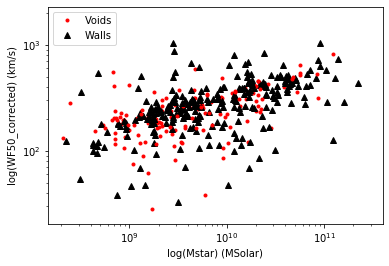

In [743]:
#Plot log(corrected WF50) vs log(MStar) while having the voids and walls separated

plt.loglog(alfaHI['Voids'], alfaHI['WF50_corrected'], '.', label = 'Voids', color = 'red')
plt.loglog(alfaHI['Walls'], alfaHI['WF50_corrected'], '^', label = 'Walls', color = 'black')
plt.loglog(mangaHI['Voids'], mangaHI['WF50_corrected'], '.', color = 'red')
plt.loglog(mangaHI['Walls'], mangaHI['WF50_corrected'], '^', color = 'black')
plt.ylabel('log(WF50_corrected) (km/s)')
plt.xlabel('log(Mstar) (MSolar)')
plt.legend()
plt.savefig('plots/log_WF50_corrected-log_Mstar_VoidsAndWalls.svg', dpi=500, facecolor='w', edgecolor='w',
        orientation='portrait', format='svg', pad_inches=0.1)
plt.show()

#### FINDING BEST-FIT LINES 

In [744]:
#function that is going to be used for all the curve_fit optimization that will be done for the best-fit lines

def f(x, m, b):
    return m*x + b

##### GBT

In [745]:
#Since we are using log data, we only want positive values
#When both wf50 and void mass are positive, add them to the two void lists
#when both wf50 and wall mass are positive, add them to the two wall lists

manga_wf50_voids_pos = []
manga_wf50_walls_pos = []
manga_voids_pos = []
manga_walls_pos = []

for i in range(len(mangaHI)):
    if mangaHI['Voids'][i] > 0 and mangaHI['WF50_corrected'][i] > 0:
        manga_wf50_voids_pos.append(mangaHI['WF50_corrected'][i])
        manga_voids_pos.append(mangaHI['Voids'][i])
    elif mangaHI['Walls'][i] > 0 and mangaHI['WF50_corrected'][i] > 0:
        manga_wf50_walls_pos.append(mangaHI['WF50_corrected'][i])
        manga_walls_pos.append(mangaHI['Walls'][i])

###### GBT_Voids

In [746]:
x_data_manga_voids = np.log10(manga_voids_pos)
y_data_manga_voids = np.log10(manga_wf50_voids_pos)

In [747]:
popt_manga_voids, pcov_manga_voids = curve_fit(f, x_data_manga_voids, y_data_manga_voids)
m_bf_manga_voids, b_bf_manga_voids = popt_manga_voids
m_err_manga_voids, b_err_manga_voids = np.sqrt(np.diag(pcov_manga_voids))
print('m_bf = ' + str(m_bf_manga_voids) + ', b_bf = ' + str(b_bf_manga_voids))
print('m_err = ' + str(m_err_manga_voids) + ', b_err = ' + str(b_err_manga_voids))

m_bf = 0.26283060701621663, b_bf = -0.1679796088406671
m_err = 0.03829047277580519, b_err = 0.37284332507546464


###### GBT_Walls

In [748]:
x_data_manga_walls = np.log10(manga_walls_pos)
y_data_manga_walls = np.log10(manga_wf50_walls_pos)

In [749]:
popt_manga_walls, pcov_manga_walls = curve_fit(f, x_data_manga_walls, y_data_manga_walls)
m_bf_manga_walls, b_bf_manga_walls = popt_manga_walls
m_err_manga_walls, b_err_manga_walls = np.sqrt(np.diag(pcov_manga_walls))
print('m_bf = ' + str(m_bf_manga_walls) + ', b_bf = ' + str(b_bf_manga_walls))
print('m_err = ' + str(m_err_manga_walls) + ', b_err = ' + str(b_err_manga_walls))

m_bf = 0.13319010076961865, b_bf = 1.1650465070233587
m_err = 0.06197991658076059, b_err = 0.611485630606819


In [750]:
#Line equations for the best-fit lines

y_data_manga_walls_line = m_bf_manga_walls* x_data_manga_walls + b_bf_manga_walls
y_data_manga_voids_line = m_bf_manga_voids* x_data_manga_voids + b_bf_manga_voids

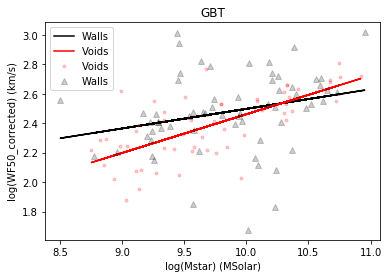

In [751]:
#Plot the log(corrected WF50) vs log(MStar) GBT data and also the best fit lines keeping voids and walls separated

plt.plot(x_data_manga_walls, y_data_manga_walls_line , '-', color = 'black', label = 'Walls')
plt.plot(x_data_manga_voids, y_data_manga_voids_line , '-', color = 'red', label = 'Voids')
plt.plot(x_data_manga_voids, y_data_manga_voids , '.', color = 'red', label = 'Voids', alpha = 0.2)
plt.plot(x_data_manga_walls, y_data_manga_walls, '^', color = 'black', label = 'Walls', alpha = 0.2)
plt.ylabel('log(WF50_corrected) (km/s)')
plt.xlabel('log(Mstar) (MSolar)')
plt.title('GBT')
plt.legend()
#plt.savefig('plots/log_WF50_corrected-log_Mstar_VoidsAndWalls.svg', dpi=500, facecolor='w', edgecolor='w',
     #   orientation='portrait', format='svg', pad_inches=0.1)
plt.show()

##### ALFALFA



In [752]:
#Since we are using log data, we only want positive values
#When both wf50 and void mass are positive, add them to the two void lists
#when both wf50 and wall mass are positive, add them to the two wall lists

alfa_wf50_voids_pos = []
alfa_wf50_walls_pos = []
alfa_voids_pos = []
alfa_walls_pos = []

for i in range(len(alfaHI)):
    if alfaHI['Voids'][i] > 0 and alfaHI['WF50_corrected'][i] > 0:
        alfa_wf50_voids_pos.append(alfaHI['WF50_corrected'][i])
        alfa_voids_pos.append(alfaHI['Voids'][i])
    elif alfaHI['Walls'][i] > 0 and alfaHI['WF50_corrected'][i] > 0:
        alfa_wf50_walls_pos.append(alfaHI['WF50_corrected'][i])
        alfa_walls_pos.append(alfaHI['Walls'][i])

###### ALFALFA_Voids

In [753]:
x_data_alfa_voids = np.log10(alfa_voids_pos)
y_data_alfa_voids = np.log10(alfa_wf50_voids_pos)

popt_alfa_voids, pcov_alfa_voids = curve_fit(f, x_data_alfa_voids, y_data_alfa_voids)
m_bf_alfa_voids, b_bf_alfa_voids = popt_alfa_voids
m_err_alfa_voids, b_err_alfa_voids = np.sqrt(np.diag(pcov_alfa_voids))
print('m_bf = ' + str(m_bf_alfa_voids) + ', b_bf = ' + str(b_bf_alfa_voids))
print('m_err = ' + str(m_err_alfa_voids) + ', b_err = ' + str(b_err_alfa_voids))


m_bf = 0.15323838196974074, b_bf = 0.8714049911494326
m_err = 0.03786013392376426, b_err = 0.3632822485878477


###### ALFALFA_Walls

In [754]:
x_data_alfa_walls = np.log10(alfa_walls_pos)
y_data_alfa_walls = np.log10(alfa_wf50_walls_pos)

popt_alfa_walls, pcov_alfa_walls = curve_fit(f, x_data_alfa_walls, y_data_alfa_walls)
m_bf_alfa_walls, b_bf_alfa_walls = popt_alfa_walls
m_err_alfa_walls, b_err_alfa_walls = np.sqrt(np.diag(pcov_alfa_walls))
print('m_bf = ' + str(m_bf_alfa_walls) + ', b_bf = ' + str(b_bf_alfa_walls))
print('m_err = ' + str(m_err_alfa_walls) + ', b_err = ' + str(b_err_alfa_walls))

m_bf = 0.23127629205967215, b_bf = 0.12377001667783138
m_err = 0.021915301405081335, b_err = 0.21599817883920858


In [755]:
#Line equations for the best-fit lines

y_data_alfa_walls_line = m_bf_alfa_walls* x_data_alfa_walls + b_bf_alfa_walls
y_data_alfa_voids_line = m_bf_alfa_voids* x_data_alfa_voids + b_bf_alfa_voids

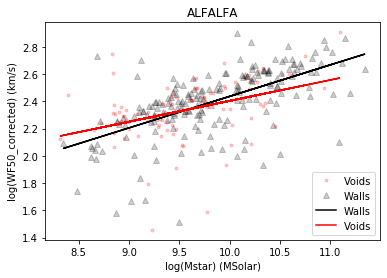

In [756]:
#Plot the log(corrected WF50) vs log(MStar) ALFALFA data and also the best fit lines keeping voids and walls separated

plt.plot(x_data_alfa_voids, y_data_alfa_voids , '.', label = 'Voids', color = 'red', alpha = 0.2)
plt.plot(x_data_alfa_walls, y_data_alfa_walls , '^', label = 'Walls', color = 'black', alpha = 0.2)
plt.plot(x_data_alfa_walls,y_data_alfa_walls_line , '-', color = 'black', label = 'Walls')
plt.plot(x_data_alfa_voids, y_data_alfa_voids_line , '-', color = 'red', label = 'Voids')

plt.ylabel('log(WF50_corrected) (km/s)')
plt.xlabel('log(Mstar) (MSolar)')
plt.title('ALFALFA')
plt.legend()
#plt.savefig('plots/log_WF50_corrected-log_Mstar_VoidsAndWalls.svg', dpi=500, facecolor='w', edgecolor='w',
 #       orientation='portrait', format='svg', pad_inches=0.1)
plt.show()

### TO-DO List (6/5/20 and 6/9/20):

>&#10004;Plot putting all the walls together and the voids together\
>&#10004;Plot for just HI-mass\
>&#10004;Plot for sum of HI and stellar mass



###### ALL

In [757]:
#Making a list for all galaxies together where voids and walls are not separated

manga_wf50_pos = []
manga_MStar_pos = []
alfa_wf50_pos =  []
alfa_MStar_pos = []


for i in range(len(mangaHI)):
    if mangaHI['WF50_corrected'][i] > 0 and mangaHI['Stellar Mass'][i] > 0:
        manga_wf50_pos.append(mangaHI['WF50_corrected'][i])
        manga_MStar_pos.append(mangaHI['Stellar Mass'][i])

for i in range(len(alfaHI)):
     if alfaHI['WF50_corrected'][i] > 0 and alfaHI['Stellar Mass'][i] > 0:
        alfa_wf50_pos.append(alfaHI['WF50_corrected'][i])
        alfa_MStar_pos.append(alfaHI['Stellar Mass'][i])

In [758]:
len(manga_MStar_pos)

154

In [759]:
#Joins both GBT and ALFALFA wf50 and stellar mass lists

wf50_pos = manga_wf50_pos + alfa_wf50_pos 
MStar_pos = manga_MStar_pos + alfa_MStar_pos

In [760]:
y_data_wf50 = np.log10(wf50_pos)
x_data_MStar = np.log10(MStar_pos)

popt_all, pcov_all = curve_fit(f, x_data_MStar, y_data_wf50)
m_bf_all, b_bf_all = popt_all
m_err_all, b_err_all = np.sqrt(np.diag(pcov_all))
m_bf_all_2 = round(m_bf_all, 2)
b_bf_all_2 = round(b_bf_all, 2)
print('m_bf = ' + str(m_bf_all) + ', b_bf = ' + str(b_bf_all))
print('m_err = ' + str(m_err_all) + ', b_err = ' + str(b_err_all))

m_bf = 0.23129020123170174, b_bf = 0.1314583713602947
m_err = 0.01515376810423297, b_err = 0.14769736928327598


In [761]:
#Line equations for the best-fit lines for all galaxies from both GBT and ALFALFA

y_data_wf50_line = m_bf_all* x_data_MStar + b_bf_all
print('Best-fit line equation for all galaxies stellar mass given by the equation: log(WF50 velocity) = ' + str(m_bf_all_2) + 'log(Stellar Mass) + ' +  str(b_bf_all_2))

Best-fit line equation for all galaxies stellar mass given by the equation: log(WF50 velocity) = 0.23log(Stellar Mass) + 0.13


###### PLOTS

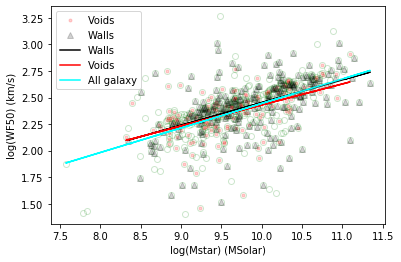

In [762]:
#Plotting the voids, walls from data table and the best-fit lines
#log(W.WF50 velocity) = 0.21log(W.Stellar Mass) + 0.31
#log(V.WF50 velocity) = 0.20log(V.Stellar Mass) + 0.45
#log(WF50 velocity) = 0.23log(Stellar Mass) + 0.13

plt.plot(x_data_MStar, y_data_wf50, 'o', color = 'green', alpha = 0.2, fillstyle = 'none')
plt.plot(x_data_voids, y_data_voids , '.', label = 'Voids', color = 'red', alpha = 0.18)
plt.plot(x_data_walls, y_data_walls , '^', label = 'Walls', color = 'black', alpha = 0.18)
plt.plot(x_data_walls,y_data_walls_line , '-', color = 'black', label = 'Walls')
plt.plot(x_data_voids, y_data_voids_line , '-', color = 'red', label = 'Voids')
plt.plot(x_data_MStar, y_data_wf50_line, '-', color = 'cyan', label = 'All galaxy')
plt.ylabel('log(WF50) (km/s)')
plt.xlabel('log(Mstar) (MSolar)')
plt.legend()
plt.savefig('plots/log_WF50_corrected-log_Mstar_bestFit.svg', dpi=500, facecolor='w', edgecolor='w',
        orientation='portrait', format='svg', pad_inches=0.1)
plt.savefig('plots/log_WF50_corrected-log_Mstar_bestFit.jpeg', dpi=500, facecolor='w', edgecolor='w',
        orientation='portrait', format='jpeg', pad_inches=0.1)

plt.show()

In [763]:
np.sum(x_data_walls>11)

7

##### Plotting HI-Mass

##### GBT

In [764]:
#GBT voids and manga HI mass and WF50 separated

manga_wf50_voids_HI_pos = []
manga_voids_HI_pos = []
manga_wf50_walls_HI_pos = []
manga_walls_HI_pos = []
    
for i in range(len(mangaHI)):
    if mangaHI['WF50_corrected'][i] > 0 and mangaHI['Voids'][i] > 0:
        manga_wf50_voids_HI_pos.append(mangaHI['WF50_corrected'][i])
        manga_voids_HI_pos.append(mangaHI['logMHI_corrected'][i])
       
       
    elif mangaHI['WF50_corrected'][i] > 0 and mangaHI['Walls'][i] > 0:
        manga_wf50_walls_HI_pos.append(mangaHI['WF50_corrected'][i])
        manga_walls_HI_pos.append(mangaHI['logMHI_corrected'][i])

# masking some of the outliers
j=0
while j < len(manga_voids_HI_pos):
     if manga_voids_HI_pos[j] <= 8.6:
            manga_voids_HI_pos.remove(manga_voids_HI_pos[j])
            manga_wf50_voids_HI_pos.remove(manga_wf50_voids_HI_pos[j])
     else:
        j += 1



###### ALFALFA

In [765]:
alfa_wf50_voids_HI_pos = []
alfa_voids_HI_pos = []
alfa_wf50_walls_HI_pos = []
alfa_walls_HI_pos = []
    
for i in range(len(alfaHI)):
    if alfaHI['WF50_corrected'][i] > 0 and alfaHI['Voids'][i] > 0:
        alfa_wf50_voids_HI_pos.append(alfaHI['WF50_corrected'][i])
        alfa_voids_HI_pos.append(alfaHI['logMHI_corrected'][i])
    elif alfaHI['WF50_corrected'][i] > 0 and alfaHI['Walls'][i] > 0:
        alfa_wf50_walls_HI_pos.append(alfaHI['WF50_corrected'][i])
        alfa_walls_HI_pos.append(alfaHI['logMHI_corrected'][i])
        
j=0
while j < len(alfa_voids_HI_pos):
     if alfa_voids_HI_pos[j] <= 8.6:
            alfa_voids_HI_pos.remove(alfa_voids_HI_pos[j])
            alfa_wf50_voids_HI_pos.remove(alfa_wf50_voids_HI_pos[j])
     else:
        j += 1

###### Concatenation

In [766]:
#Combines the voids of GBT set and ALFALFA set
wf50_voids_HI_pos = np.log10(alfa_wf50_voids_HI_pos + manga_wf50_voids_HI_pos)
voids_HI_pos = alfa_voids_HI_pos + manga_voids_HI_pos

#Combines the walls of GBT set and ALFALFA set
wf50_walls_HI_pos = np.log10(alfa_wf50_walls_HI_pos + manga_wf50_walls_HI_pos)
walls_HI_pos = alfa_walls_HI_pos + manga_walls_HI_pos

##### VOIDS

In [767]:
y_data_voids_HI = wf50_voids_HI_pos
x_data_voids_HI = np.array(voids_HI_pos, dtype = np.float64)

popt_voids_HI, pcov_voids_HI = curve_fit(f, x_data_voids_HI, y_data_voids_HI)
m_bf_voids_HI, b_bf_voids_HI = popt_voids_HI
m_err_voids_HI, b_err_voids_HI = np.sqrt(np.diag(pcov_voids_HI))
m_bf_voids_HI_2 = round(m_bf_voids_HI, 2)
b_bf_voids_HI_2 = round(b_bf_voids_HI, 2)
print('m_bf = ' + str(m_bf_voids_HI) + ', b_bf = ' + str(b_bf_voids_HI))
print('m_err = ' + str(m_err_voids_HI) + ', b_err = ' + str(b_err_voids_HI))

m_bf = 0.2685675792226272, b_bf = -0.2533489529445745
m_err = 0.04580441682478449, b_err = 0.4454740927109793


In [768]:
y_data_voids_HI_line = m_bf_voids_HI* x_data_voids_HI + b_bf_voids_HI
print('Best-fit line equation for void galaxies HI-mass given by the equation: log(V.WF50 velocity) = ' + str(m_bf_voids_HI_2) + 'log(V.HI-mass) + ' +  str(b_bf_voids_HI_2))

Best-fit line equation for void galaxies HI-mass given by the equation: log(V.WF50 velocity) = 0.27log(V.HI-mass) + -0.25


###### WALLS

In [769]:
y_data_walls_HI = wf50_walls_HI_pos
x_data_walls_HI = np.array(walls_HI_pos, dtype = np.float64)

popt_walls_HI, pcov_walls_HI = curve_fit(f, x_data_walls_HI, y_data_walls_HI)
m_bf_walls_HI, b_bf_walls_HI = popt_walls_HI
m_err_walls_HI, b_err_walls_HI = np.sqrt(np.diag(pcov_walls_HI))
m_bf_walls_HI_2 = round(m_bf_walls_HI, 2)
b_bf_walls_HI_2 = round(b_bf_walls_HI, 2)
print('m_bf = ' + str(m_bf_walls_HI) + ', b_bf = ' + str(b_bf_walls_HI))
print('m_err = ' + str(m_err_walls_HI) + ', b_err = ' + str(b_err_walls_HI))

m_bf = 0.3539393464234689, b_bf = -1.0326792834362442
m_err = 0.039089805982111, b_err = 0.3813598273646029


In [770]:
y_data_walls_HI_line = m_bf_walls_HI* x_data_walls_HI + b_bf_walls_HI
print('Best-fit line equation for wall galaxies HI-mass given by the equation: log(W.WF50 velocity) = ' + str(m_bf_walls_HI_2) + 'log(W.HI-mass)' +  str(b_bf_walls_HI_2))

Best-fit line equation for wall galaxies HI-mass given by the equation: log(W.WF50 velocity) = 0.35log(W.HI-mass)-1.03


###### ALL

In [771]:
#Picking out the postive values for wf50 and HI mass from GBT and ALFALFA data

manga_wf50_HI_pos = []
manga_HI_pos = []
alfa_wf50_HI_pos = []
alfa_HI_pos = []

for i in range(len(mangaHI)):
    if mangaHI['WF50_corrected'][i] > 0 and mangaHI['logMHI_corrected'][i] > 0:
        manga_wf50_HI_pos.append(mangaHI['WF50_corrected'][i])
        manga_HI_pos.append(mangaHI['logMHI'][i])

for i in range(len(alfaHI)):
     if alfaHI['WF50_corrected'][i] > 0 and alfaHI['logMHI_corrected'][i] > 0:
        alfa_wf50_HI_pos.append(alfaHI['WF50_corrected'][i])
        alfa_HI_pos.append(alfaHI['logMHI_corrected'][i])

In [772]:
#Joining ALFALFA and GBT data

all_wf50_HI_pos = manga_wf50_HI_pos + alfa_wf50_HI_pos
all_HI_pos = manga_HI_pos + alfa_HI_pos

In [773]:
y_data_all_HI = np.log10(all_wf50_HI_pos)
x_data_all_HI = np.array(all_HI_pos,dtype=np.float64)

popt_all_HI, pcov_all_HI = curve_fit(f, x_data_all_HI, y_data_all_HI)
m_bf_all_HI, b_bf_all_HI = popt_all_HI
m_err_all_HI, b_err_all_HI = np.sqrt(np.diag(pcov_all_HI))
m_bf_all_HI_2 = round(m_bf_all_HI, 2)
b_bf_all_HI_2 = round(b_bf_all_HI, 2)
print('m_bf = ' + str(m_bf_all_HI) + ', b_bf = ' + str(b_bf_all_HI))
print('m_err = ' + str(m_err_all_HI) + ', b_err = ' + str(b_err_all_HI))

m_bf = 0.3323312566299522, b_bf = -0.8367365363079646
m_err = 0.023776108887863273, b_err = 0.23041694433641524


In [774]:
y_data_all_HI_line = m_bf_all_HI* x_data_all_HI + b_bf_all_HI

print('Best-fit line equation for HI-mass given by the equation: log(WF50 velocity) = ' + str(m_bf_all_HI_2) + 'log(HI-Mass)' +  str(b_bf_all_HI_2))

Best-fit line equation for HI-mass given by the equation: log(WF50 velocity) = 0.33log(HI-Mass)-0.84


###### PLOTS

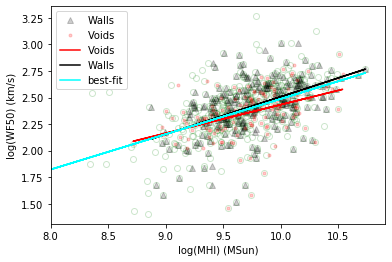

In [775]:
#Plotting HI-data and wf50 from data table and the best-fit lines
#log(V.WF50 velocity) = 0.24log(V.HI-mass) + 0.08
#log(W.WF50 velocity) = 0.35log(W.HI-mass)-0.96
#log(WF50 velocity) = 0.32log(HI-Mass)-0.69
plt.plot(x_data_all_HI, y_data_all_HI, 'o', color = 'green', alpha = 0.2, fillstyle = 'none')
plt.plot(x_data_walls_HI, y_data_walls_HI, '^', color = 'black', alpha = 0.2, label = 'Walls')
plt.plot(x_data_voids_HI, y_data_voids_HI, '.', color = 'red', alpha = 0.2, label = 'Voids')
plt.plot(x_data_voids_HI, y_data_voids_HI_line, '-', color = 'red', label = 'Voids')
plt.plot(x_data_walls_HI, y_data_walls_HI_line, '-', color = 'black', label = 'Walls')
plt.plot(x_data_all_HI, y_data_all_HI_line, '-', label = 'best-fit', color = 'cyan')
plt.xlim(xmin = 8)
plt.xlabel('log(MHI) (MSun)')
plt.ylabel('log(WF50) (km/s)')
plt.legend()
plt.savefig('plots/log_WF50_corrected-log_HI_bestFit.svg', dpi=500, facecolor='w', edgecolor='w',
        orientation='portrait', format='svg', pad_inches=0.1)
plt.savefig('plots/log_WF50_corrected-log_HI_bestFit.jpeg', dpi=500, facecolor='w', edgecolor='w',
        orientation='portrait', format='jpeg', pad_inches=0.1)
plt.show()

##### Plot for sum of HI mass and Stellar Mass

##### GBT

In [776]:
#Adding a column of the sum of HI and Stellar Mass to GBT
manga_totMass = []
for i in range(len(mangaHI)):
    if mangaHI['MHI'][i]> 0:
        manga_totMass.append(mangaHI['MHI_corrected'][i] + mangaHI['Stellar Mass'][i])
    else:
        manga_totMass.append(-999.0)

#mangaHI.remove_column('MTotal')
mangaHI.add_column(Column(np.asarray(manga_totMass, dtype = np.float64, order = 'F'), name = 'MTotal'), index=15)

In [777]:
#Picking out the positive values

manga_wf50_Tot_voids_pos = []
manga_MTot_voids_pos = []
manga_wf50_Tot_walls_pos = []
manga_MTot_walls_pos = []

for i in range(len(mangaHI)):
    if mangaHI['WF50_corrected'][i] > 0 and mangaHI['Voids'][i] > 0 and mangaHI['MHI'][i] != 0.0:
        manga_wf50_Tot_voids_pos.append(mangaHI['WF50_corrected'][i])
        manga_MTot_voids_pos.append(mangaHI['MTotal'][i])
    elif mangaHI['WF50_corrected'][i] > 0 and mangaHI['Walls'][i] > 0 and mangaHI['MHI'][i] != 0.0:
        manga_wf50_Tot_walls_pos.append(mangaHI['WF50_corrected'][i])
        manga_MTot_walls_pos.append(mangaHI['MTotal'][i])



##### ALFALFA

In [778]:
#Adding a column of the sum of HI and Stellar Mass to ALFALFA 
alfa_totMass = []
for i in range(len(alfaHI)):
    if alfaHI['MHI'][i]> 0:
        alfa_totMass.append(alfaHI['MHI_corrected'][i] + alfaHI['Stellar Mass'][i])
    else:
        alfa_totMass.append(-999.0)
#alfaHI.remove_column('MTotal')
alfaHI.add_column(Column(np.asarray(alfa_totMass, dtype = np.float64, order = 'F'), name = 'MTotal'), index=12)

In [779]:
#Picking out the positive values

alfa_wf50_Tot_voids_pos = []
alfa_MTot_voids_pos = []
alfa_wf50_Tot_walls_pos = []
alfa_MTot_walls_pos = []

for i in range(len(alfaHI)):
    if alfaHI['WF50_corrected'][i] > 0 and alfaHI['Voids'][i] > 0 and alfaHI['MHI'][i] != 0.0:
        alfa_wf50_Tot_voids_pos.append(alfaHI['WF50_corrected'][i])
        alfa_MTot_voids_pos.append(alfaHI['MTotal'][i])
    elif alfaHI['WF50_corrected'][i] > 0 and alfaHI['Walls'][i] > 0 and alfaHI['MHI'][i] != 0.0:
        alfa_wf50_Tot_walls_pos.append(alfaHI['WF50_corrected'][i])
        alfa_MTot_walls_pos.append(alfaHI['MTotal'][i])


##### Concatenation

In [780]:
#Joining ALFALFA and GBT data

wf50_Tot_voids_pos = alfa_wf50_Tot_voids_pos + manga_wf50_Tot_voids_pos
MTot_voids_pos = alfa_MTot_voids_pos + manga_MTot_voids_pos
wf50_Tot_walls_pos = alfa_wf50_Tot_walls_pos + manga_wf50_Tot_walls_pos
MTot_walls_pos = alfa_MTot_walls_pos + manga_MTot_walls_pos

###### VOIDS

In [781]:
y_data_Tot_voids = np.log10(wf50_Tot_voids_pos)
x_data_Tot_voids = np.log10(MTot_voids_pos)

popt_Tot_voids, pcov_Tot_voids = curve_fit(f, x_data_Tot_voids, y_data_Tot_voids)
m_bf_Tot_voids, b_bf_Tot_voids = popt_Tot_voids
m_err_Tot_voids, b_err_Tot_voids = np.sqrt(np.diag(pcov_Tot_voids))
m_bf_Tot_voids_2 = round(m_bf_Tot_voids, 2)
b_bf_Tot_voids_2 = round(b_bf_Tot_voids, 2)
print('m_bf = ' + str(m_bf_Tot_voids) + ', b_bf = ' + str(b_bf_Tot_voids))
print('m_err = ' + str(m_err_Tot_voids) + ', b_err = ' + str(b_err_Tot_voids))

m_bf = 0.29057092243302474, b_bf = -0.5561199316428763
m_err = 0.0354700399074446, b_err = 0.3558872744543094


In [782]:
y_data_Tot_voids_line = m_bf_Tot_voids * x_data_Tot_voids + b_bf_Tot_voids
print('Best-fit line equation for void galaxy (HI+Stellar)-mass given by the equation: log(V.WF50 velocity) = ' + str(m_bf_Tot_voids_2) + 'log(V.(HI+Stellar)-Mass)' +  str(b_bf_Tot_voids_2))

Best-fit line equation for void galaxy (HI+Stellar)-mass given by the equation: log(V.WF50 velocity) = 0.29log(V.(HI+Stellar)-Mass)-0.56


##### WALLS

In [783]:
y_data_Tot_walls = np.log10(wf50_Tot_walls_pos)
x_data_Tot_walls = np.log10(MTot_walls_pos)

popt_Tot_walls, pcov_Tot_walls = curve_fit(f, x_data_Tot_walls, y_data_Tot_walls)
m_bf_Tot_walls, b_bf_Tot_walls = popt_Tot_walls
m_err_Tot_walls, b_err_Tot_walls = np.sqrt(np.diag(pcov_Tot_walls))
m_bf_Tot_walls_2 = round(m_bf_Tot_walls, 2)
b_bf_Tot_walls_2 = round(b_bf_Tot_walls, 2)
print('m_bf = ' + str(m_bf_Tot_walls) + ', b_bf = ' + str(b_bf_Tot_walls))
print('m_err = ' + str(m_err_Tot_walls) + ', b_err = ' + str(b_err_Tot_walls))

m_bf = 0.30967859235606665, b_bf = -0.7276692471226982
m_err = 0.02880966293900683, b_err = 0.29294762143292247


In [784]:
y_data_Tot_walls_line = m_bf_Tot_walls * x_data_Tot_walls + b_bf_Tot_walls
print('Best-fit line equation for wall galaxy (HI+Stellar)-mass given by the equation: log(W.WF50 velocity) = ' + str(m_bf_Tot_walls_2) + 'log(W.(HI+Stellar)-Mass)' +  str(b_bf_Tot_walls_2))

Best-fit line equation for wall galaxy (HI+Stellar)-mass given by the equation: log(W.WF50 velocity) = 0.31log(W.(HI+Stellar)-Mass)-0.73


##### ALL

In [785]:
#Putting all galaxies together

wf50_Tot_all = wf50_Tot_voids_pos+wf50_Tot_walls_pos
MTot_all = MTot_voids_pos + MTot_walls_pos

In [786]:
y_data_Tot_all = np.log10(wf50_Tot_all)
x_data_Tot_all = np.log10(MTot_all)

popt_Tot_all, pcov_Tot_all = curve_fit(f, x_data_Tot_all, y_data_Tot_all)
m_bf_Tot_all, b_bf_Tot_all = popt_Tot_all
m_err_Tot_all, b_err_Tot_all = np.sqrt(np.diag(pcov_Tot_all))
m_bf_Tot_all_2 = round(m_bf_Tot_all, 2)
b_bf_Tot_all_2 = round(b_bf_Tot_all, 2)
print('m_bf = ' + str(m_bf_Tot_all) + ', b_bf = ' + str(b_bf_Tot_all))
print('m_err = ' + str(m_err_Tot_all) + ', b_err = ' + str(b_err_Tot_all))

m_bf = 0.3063275281492499, b_bf = -0.7011800759562179
m_err = 0.02218157192460243, b_err = 0.2244496302274632


In [787]:
y_data_Tot_all_line = m_bf_Tot_all * x_data_Tot_all + b_bf_Tot_all
print('Best-fit line equation for all galaxy (HI+Stellar)-mass given by the equation: log(WF50 velocity) = ' + str(m_bf_Tot_all_2) + 'log((HI+Stellar)-Mass)' +  str(b_bf_Tot_all_2))

Best-fit line equation for all galaxy (HI+Stellar)-mass given by the equation: log(WF50 velocity) = 0.31log((HI+Stellar)-Mass)-0.7


##### PLOTS

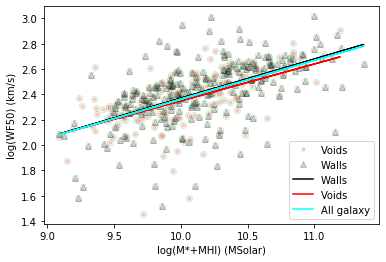

In [788]:
#Plotting HI+Stellar and wf50 from data table and the best-fit lines
#log(W.WF50 velocity) = 0.30log(W.(HI+Stellar)-Mass)-0.56
#log(V.WF50 velocity) = 0.28log(V.(HI+Stellar)-Mass)-0.37
#log(WF50 velocity) = 0.29log((HI+Stellar)-Mass)-0.52

plt.plot(x_data_Tot_all, y_data_Tot_all, 'o', color = 'green', alpha = 0.18, fillstyle = 'none')
plt.plot(x_data_Tot_voids, y_data_Tot_voids , '.', label = 'Voids', color = 'red', alpha = 0.18)
plt.plot(x_data_Tot_walls, y_data_Tot_walls , '^', label = 'Walls', color = 'black', alpha = 0.18)
plt.plot(x_data_Tot_walls,y_data_Tot_walls_line , '-', color = 'black', label = 'Walls')
plt.plot(x_data_Tot_voids, y_data_Tot_voids_line , '-', color = 'red', label = 'Voids')
plt.plot(x_data_Tot_all, y_data_Tot_all_line, '-', color = 'cyan', label = 'All galaxy')
plt.ylabel('log(WF50) (km/s)')
plt.xlabel('log(M*+MHI) (MSolar)')
plt.legend()
plt.savefig('plots/log_WF50_corrected-log_MStar+HI_bestFit.svg', dpi=500, facecolor='w', edgecolor='w',
        orientation='portrait', format='svg', pad_inches=0.1)
plt.savefig('plots/log_WF50_corrected-log_MStar+HI_bestFit.jpeg', dpi=500, facecolor='w', edgecolor='w',
        orientation='portrait', format='jpeg', pad_inches=0.1)

plt.show()

###### Stellar Mass vs HI-mass

>Let’s look at the relationship between the stellar mass and the HI mass.  Plot log(M*) v. log(M_HI), coloring voids red and walls black, and fit linear relationships for the voids, the walls, and all the galaxies together.

##### GBT

In [789]:
manga_MStar_voids = []
manga_MStar_walls = []
manga_HI_voids = []
manga_HI_walls = []

for i in range(len(mangaHI)):
    if mangaHI['Voids'][i] > 0 and mangaHI['logMHI_corrected'][i] > 0:
        manga_MStar_voids.append(mangaHI['Stellar Mass'][i])
        manga_HI_voids.append(mangaHI['logMHI_corrected'][i])
    elif mangaHI['Walls'][i] > 0 and mangaHI['logMHI_corrected'][i] > 0:
        manga_MStar_walls.append(mangaHI['Stellar Mass'][i])
        manga_HI_walls.append(mangaHI['logMHI_corrected'][i])
        
# masking some of the outliers
j=0
while j < len(manga_HI_voids):
     if manga_HI_voids[j] <= 8:
            manga_HI_voids.remove(manga_HI_voids[j])
            manga_MStar_voids.remove( manga_MStar_voids[j])
     else:
        j += 1

k=0
while k < len(manga_HI_walls):
     if manga_HI_walls[k] <= 8:
            manga_HI_walls.remove(manga_HI_walls[k])
            manga_MStar_walls.remove( manga_MStar_walls[k])
     else:
        k += 1

##### ALFALFA

In [790]:
alfa_MStar_voids = []
alfa_MStar_walls = []
alfa_HI_voids = []
alfa_HI_walls = []

for i in range(len(alfaHI)):
    if alfaHI['Voids'][i] > 0 and alfaHI['logMHI_corrected'][i] > 0:
        alfa_MStar_voids.append(alfaHI['Stellar Mass'][i])
        alfa_HI_voids.append(alfaHI['logMHI_corrected'][i])
    elif alfaHI['Walls'][i] > 0 and alfaHI['logMHI_corrected'][i] > 0:
        alfa_MStar_walls.append(alfaHI['Stellar Mass'][i])
        alfa_HI_walls.append(alfaHI['logMHI_corrected'][i])  
        
# masking some of the outliers
l=0
while l < len(alfa_HI_voids):
     if alfa_HI_voids[j] <= 8:
            alfa_HI_voids.remove(alfa_HI_voids[j])
            alfa_MStar_voids.remove(alfa_MStar_voids[j])
     else:
        l += 1

m=0
while m < len(alfa_HI_walls):
     if alfa_HI_walls[k] <= 8:
            alfa_HI_walls.remove(alfa_HI_walls[k])
            alfa_MStar_walls.remove(alfa_MStar_walls[k])
     else:
        m += 1

##### Concatenation

In [791]:
MStar_voids = alfa_MStar_voids + manga_MStar_voids
HI_voids =  alfa_HI_voids + manga_HI_voids

MStar_walls = alfa_MStar_walls + manga_MStar_walls
HI_walls =  alfa_HI_walls + manga_HI_walls

##### VOIDS

In [792]:
y_data_voids_mass = np.log10(MStar_voids)
x_data_voids_mass = np.array(HI_voids, dtype = np.float64)

popt_voids_mass, pcov_voids_mass = curve_fit(f, x_data_voids_mass, y_data_voids_mass)
m_bf_voids_mass, b_bf_voids_mass = popt_voids_mass
m_err_voids_mass, b_err_voids_mass = np.sqrt(np.diag(pcov_voids_mass))
m_bf_voids_mass_2 = round(m_bf_voids_mass, 2)
b_bf_voids_mass_2 = round(b_bf_voids_mass, 2)
print('m_bf = ' + str(m_bf_voids_mass) + ', b_bf = ' + str(b_bf_voids_mass))
print('m_err = ' + str(m_err_voids_mass) + ', b_err = ' + str(b_err_voids_mass))

m_bf = 0.7807742683017318, b_bf = 2.0799862949321475
m_err = 0.09784869613198734, b_err = 0.9480614633472488


In [793]:
y_data_voids_mass_line = m_bf_voids_mass * x_data_voids_mass + b_bf_voids_mass
print('Best-fit line equation for void galaxy M* vs HI given by the equation: log(V.M*)) = ' + str(m_bf_voids_mass_2) + 'log(V.HI) + ' +  str(b_bf_voids_mass_2))

Best-fit line equation for void galaxy M* vs HI given by the equation: log(V.M*)) = 0.78log(V.HI) + 2.08


##### WALLS

In [794]:
y_data_walls_mass = np.log10(MStar_walls)
x_data_walls_mass = np.array(HI_walls, dtype = np.float64)

popt_walls_mass, pcov_walls_mass = curve_fit(f, x_data_walls_mass, y_data_walls_mass)
m_bf_walls_mass, b_bf_walls_mass = popt_walls_mass
m_err_walls_mass, b_err_walls_mass = np.sqrt(np.diag(pcov_walls_mass))
m_bf_walls_mass_2 = round(m_bf_walls_mass, 2)
b_bf_walls_mass_2 = round(b_bf_walls_mass, 2)
print('m_bf = ' + str(m_bf_walls_mass) + ', b_bf = ' + str(b_bf_walls_mass))
print('m_err = ' + str(m_err_walls_mass) + ', b_err = ' + str(b_err_walls_mass))

m_bf = 1.025896644500918, b_bf = -0.14756760239210154
m_err = 0.08865687462886183, b_err = 0.8647030956537022


In [795]:
y_data_walls_mass_line = m_bf_walls_mass * x_data_walls_mass + b_bf_walls_mass
print('Best-fit line equation for wall galaxy M* vs HI given by the equation: log(W.M*)) = ' + str(m_bf_walls_mass_2) + 'log(W.HI) + ' +  str(b_bf_walls_mass_2))

Best-fit line equation for wall galaxy M* vs HI given by the equation: log(W.M*)) = 1.03log(W.HI) + -0.15


##### ALL

In [796]:
MStar_all = MStar_voids+MStar_walls
HI_all = HI_voids+HI_walls

In [797]:
y_data_mass_all = np.log10(MStar_all)
x_data_mass_all = np.array(HI_all, dtype = np.float64)

popt_mass_all, pcov_mass_all = curve_fit(f, x_data_mass_all, y_data_mass_all)
m_bf_mass_all, b_bf_mass_all = popt_mass_all
m_err_mass_all, b_err_mass_all = np.sqrt(np.diag(pcov_mass_all))
m_bf_mass_all_2 = round(m_bf_mass_all, 2)
b_bf_mass_all_2 = round(b_bf_mass_all, 2)
print('m_bf = ' + str(m_bf_mass_all) + ', b_bf = ' + str(b_bf_mass_all))
print('m_err = ' + str(m_err_mass_all) + ', b_err = ' + str(b_err_mass_all))

m_bf = 0.9359670857406553, b_bf = 0.6709874489612142
m_err = 0.06639783072625811, b_err = 0.6459704989142204


In [798]:
y_data_mass_all_line = m_bf_mass_all * x_data_mass_all + b_bf_mass_all
print('Best-fit line equation for all galaxy M* vs HI given by the equation: log(M*)) = ' + str(m_bf_mass_all_2) + 'log(HI) + ' +  str(b_bf_mass_all_2))

Best-fit line equation for all galaxy M* vs HI given by the equation: log(M*)) = 0.94log(HI) + 0.67


##### PLOTS

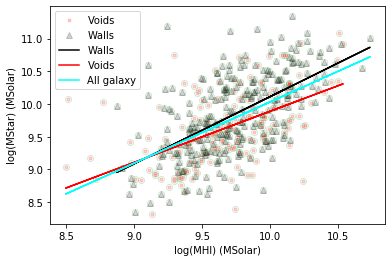

In [799]:
#Stellar Mass vs HI mass plots for voids, walls, and all galaxy
#log(V.M*)) = 0.64log(V.HI) + 3.52
#log(W.M*)) = 0.93log(W.HI) + 0.81
#log(M*)) = 0.82log(HI) + 1.83

plt.plot(x_data_mass_all, y_data_mass_all, 'o', color = 'green', alpha = 0.18, fillstyle = 'none')
plt.plot(x_data_voids_mass, y_data_voids_mass , '.', label = 'Voids', color = 'red', alpha = 0.18)
plt.plot(x_data_walls_mass, y_data_walls_mass , '^', label = 'Walls', color = 'black', alpha = 0.18)
plt.plot(x_data_walls_mass,y_data_walls_mass_line , '-', color = 'black', label = 'Walls')
plt.plot(x_data_voids_mass, y_data_voids_mass_line , '-', color = 'red', label = 'Voids')
plt.plot(x_data_mass_all, y_data_mass_all_line, '-', color = 'cyan', label = 'All galaxy')
plt.xlabel('log(MHI) (MSolar)')
plt.ylabel('log(MStar) (MSolar)')
plt.legend()
plt.show()

### WF50_corrected vs v_max plot

##### ADDING VMAX COLUMN TO GBT AND ALFALFA DATA

In [800]:
#curve_used = 0, 1, -1 avg_vmax, pos, neg 
manga_avg_vmax = []
manga_pos_vmax = []
manga_neg_vmax = []

for i in range(len(mangaHI)):
    for j in range(len(table2)):
        if (mangaHI['Plate'][i], mangaHI['IFU'][i]) == (table2['MaNGA_plate'][j], table2['MaNGA_IFU'][j]):
            if table2['curve_used'][j] == 0:
                manga_avg_vmax.append(table2['avg_v_max'][j])
                manga_pos_vmax.append(-999.0)
                manga_neg_vmax.append(-999.0)
            elif table2['curve_used'][j] == 1:
                manga_avg_vmax.append(-999.0)
                manga_pos_vmax.append(table2['pos_v_max'][j])
                manga_neg_vmax.append(-999.0)
            elif table2['curve_used'][j] == -1:
                manga_avg_vmax.append(-999.0)
                manga_pos_vmax.append(-999.0)
                manga_neg_vmax.append(table2['neg_v_max'][j])
            else:
                manga_avg_vmax.append(-99.0)
                manga_pos_vmax.append(-99.0)
                manga_neg_vmax.append(-99.0)
    
mangaHI.add_column(Column(np.asarray(manga_avg_vmax, dtype=np.float64, order='F'), name='avg_v_max'))
mangaHI.add_column(Column(np.asarray(manga_pos_vmax, dtype=np.float64, order='F'), name='pos_v_max'))
mangaHI.add_column(Column(np.asarray(manga_neg_vmax, dtype=np.float64, order='F'), name='neg_v_max'))

In [801]:
mangaHI.write('out_txt/MaNGAHI_with_vmax.txt', format = 'ascii.commented_header', overwrite = True)

In [802]:
alfa_avg_vmax = []
alfa_pos_vmax = []
alfa_neg_vmax = []

for i in range(len(alfaHI)):
    for j in range(len(table2)):
        if (alfaHI['Plate'][i], alfaHI['IFU'][i]) == (table2['MaNGA_plate'][j], table2['MaNGA_IFU'][j]):
            if table2['curve_used'][j] == 0:
                alfa_avg_vmax.append(table2['avg_v_max'][j])
                alfa_pos_vmax.append(-999.0)
                alfa_neg_vmax.append(-999.0)
            elif table2['curve_used'][j] == 1:
                alfa_avg_vmax.append(-999.0)
                alfa_pos_vmax.append(table2['pos_v_max'][j])
                alfa_neg_vmax.append(-999.0)
            elif table2['curve_used'][j] == -1:
                alfa_avg_vmax.append(-999.0)
                alfa_pos_vmax.append(-999.0)
                alfa_neg_vmax.append(table2['neg_v_max'][j])
            else:
                alfa_avg_vmax.append(-99.0)
                alfa_pos_vmax.append(-99.0)
                alfa_neg_vmax.append(-99.0)
    
alfaHI.add_column(Column(np.asarray(alfa_avg_vmax, dtype=np.float64, order='F'), name='avg_v_max'))
alfaHI.add_column(Column(np.asarray(alfa_pos_vmax, dtype=np.float64, order='F'), name='pos_v_max'))
alfaHI.add_column(Column(np.asarray(alfa_neg_vmax, dtype=np.float64, order='F'), name='neg_v_max'))

In [803]:
alfaHI.write('out_txt/ALFALFAHI_with_vmax.txt', format = 'ascii.commented_header', overwrite = True)

##### GBT

In [804]:
manga_wf50_voids_v = []
manga_vmax_voids_v = []
manga_wf50_walls_v = []
manga_vmax_walls_v = []

for i in range(len(mangaHI)):
    if mangaHI['WF50_corrected'][i] > 0 and mangaHI['Voids'][i] > 0:
        if mangaHI['avg_v_max'][i] > 0:
            manga_vmax_voids_v.append(mangaHI['avg_v_max'][i])
            manga_wf50_voids_v.append(mangaHI['WF50_corrected'][i])
        elif mangaHI['pos_v_max'][i] > 0:
            manga_vmax_voids_v.append(mangaHI['pos_v_max'][i])
            manga_wf50_voids_v.append(mangaHI['WF50_corrected'][i])
        elif mangaHI['neg_v_max'][i] > 0:
            manga_vmax_voids_v.append(mangaHI['neg_v_max'][i])
            manga_wf50_voids_v.append(mangaHI['WF50_corrected'][i])
    
    elif mangaHI['WF50_corrected'][i] > 0 and mangaHI['Walls'][i] > 0:
        if mangaHI['avg_v_max'][i] > 0:
            manga_vmax_walls_v.append(mangaHI['avg_v_max'][i])
            manga_wf50_walls_v.append(mangaHI['WF50_corrected'][i])
        elif mangaHI['pos_v_max'][i] > 0:
            manga_vmax_walls_v.append(mangaHI['pos_v_max'][i])
            manga_wf50_walls_v.append(mangaHI['WF50_corrected'][i])
        elif mangaHI['neg_v_max'][i] > 0:
            manga_vmax_walls_v.append(mangaHI['neg_v_max'][i])
            manga_wf50_walls_v.append(mangaHI['WF50_corrected'][i])

##### ALFALFA

In [805]:
alfa_wf50_voids_v = []
alfa_vmax_voids_v = []
alfa_wf50_walls_v = []
alfa_vmax_walls_v = []

for i in range(len(alfaHI)):
    if alfaHI['WF50_corrected'][i] > 0 and alfaHI['Voids'][i] > 0:
        if alfaHI['avg_v_max'][i] > 0:
            alfa_vmax_voids_v.append(alfaHI['avg_v_max'][i])
            alfa_wf50_voids_v.append(alfaHI['WF50_corrected'][i])
        elif alfaHI['pos_v_max'][i] > 0:
            alfa_vmax_voids_v.append(alfaHI['pos_v_max'][i])
            alfa_wf50_voids_v.append(alfaHI['WF50_corrected'][i])
        elif alfaHI['neg_v_max'][i] > 0:
            alfa_vmax_voids_v.append(alfaHI['neg_v_max'][i])
            alfa_wf50_voids_v.append(alfaHI['WF50_corrected'][i])
    
    elif alfaHI['WF50_corrected'][i] > 0 and alfaHI['Walls'][i] > 0:
        if alfaHI['avg_v_max'][i] > 0:
            alfa_vmax_walls_v.append(alfaHI['avg_v_max'][i])
            alfa_wf50_walls_v.append(alfaHI['WF50_corrected'][i])
        elif alfaHI['pos_v_max'][i] > 0:
            alfa_vmax_walls_v.append(alfaHI['pos_v_max'][i])
            alfa_wf50_walls_v.append(alfaHI['WF50_corrected'][i])
        elif alfaHI['neg_v_max'][i] > 0:
            alfa_vmax_walls_v.append(alfaHI['neg_v_max'][i])
            alfa_wf50_walls_v.append(alfaHI['WF50_corrected'][i])

##### Concatenation

In [806]:
wf50_voids_v = np.log10(alfa_wf50_voids_v + manga_wf50_voids_v)
vmax_voids_v = np.log10(alfa_vmax_voids_v + manga_vmax_voids_v)

wf50_walls_v = np.log10(alfa_wf50_walls_v + manga_wf50_walls_v)
vmax_walls_v = np.log10(alfa_vmax_walls_v + manga_vmax_walls_v)

##### Plot of best fit line with m=1 to find y-intercept

In [807]:
wf50_voids_fixed = []
vmax_voids_fixed = []

wf50_walls_fixed = []
vmax_walls_fixed = []

for i in range(len(wf50_voids_v)):
    if wf50_voids_v[i] > vmax_voids_v[i]:
        wf50_voids_fixed.append(wf50_voids_v[i])
        vmax_voids_fixed.append(vmax_voids_v[i])
for j in range(len(wf50_walls_v)):
    if wf50_walls_v[i] > vmax_walls_v[i]:
        wf50_walls_fixed.append(wf50_walls_v[i])
        vmax_walls_fixed.append(vmax_walls_v[i])


In [808]:
wf50_fixed = wf50_voids_fixed + wf50_walls_fixed
vmax_fixed = vmax_voids_fixed + vmax_walls_fixed

In [809]:
def g(x, b):
    return x + b

In [810]:
y_data_vel = wf50_fixed
x_data_vel = vmax_fixed

popt_vel, pcov_vel = curve_fit(g, x_data_vel, y_data_vel)
b_bf_vel = popt_vel
b_err_vel = np.sqrt(np.diag(pcov_vel))
b_bf_vel_2 = np.round(b_bf_vel, 2)
print('m_bf = 1, b_bf = ' + str(b_bf_vel))
print('m_err = 1, b_err = ' + str(b_err_vel))

m_bf = 1, b_bf = [0.27711495]
m_err = 1, b_err = [0.01395742]


In [811]:
y_data_vel_line = x_data_vel + b_bf_vel
print('Best-fit line for wf50 vs vmax for all galaxies given by: log(WF50) = log(vmax) + ' + str(b_bf_vel_2))

Best-fit line for wf50 vs vmax for all galaxies given by: log(WF50) = log(vmax) + [0.28]


##### PLOT

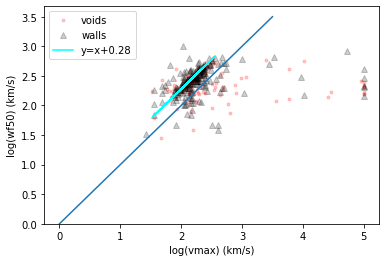

In [812]:
plt.plot(vmax_voids_v, wf50_voids_v, '.', color = 'red', label = 'voids', alpha = 0.2)
plt.plot(vmax_walls_v, wf50_walls_v, '^', color = 'black', label = 'walls', alpha = 0.2)
plt.plot(x_data_vel, y_data_vel_line, '-', color = 'cyan', label = 'y=x+0.28')
plt.plot([0,3.5], [0,3.5])
plt.xlabel('log(vmax) (km/s)')
plt.ylabel('log(wf50) (km/s)')
plt.ylim(ymin = 0)
plt.legend()
plt.show()

### Binning and median
 >Bin the masses in half-MSolar (and 1 solar MSolar), find the median WF50 for each bin, plot the bin center vs median WF50.\
 >Mass error bars = 0.5 * width of bin & WF50 error bars = 1/sqrt(N), N = number in each bin

#### WF50 vs M*

###### Binning GBT stellar masses and diving into voids and walls

In [813]:
logMStar_manga = np.log10(mangaHI['Stellar Mass'])
#mangaHI.remove_column('logMStar')
mangaHI.add_column(logMStar_manga, name ='logMStar', index = 14)

In [814]:
print(max(logMStar_manga))
print(min(logMStar_manga))

11.091085761453927
8.433425204922354


In [815]:
#manga_voids_bin1 = []
manga_voids_bin1 = []
manga_voids_bin2 = []
manga_voids_bin3 = []
manga_voids_bin4 = []
manga_voids_bin5 = []
#manga_voids_bin6 = []

for i in range(len(mangaHI)):
    #if 8<=mangaHI['logMStar'][i]<=8.5 and mangaHI['Voids'][i]>0:
        #manga_voids_bin1.append(mangaHI['Voids'][i])
    if 8.5<mangaHI['logMStar'][i]<=9 and mangaHI['Voids'][i]>0 and mangaHI['WF50_corrected'][i]>0:
        manga_voids_bin1.append(mangaHI['Voids'][i])
    if 9<mangaHI['logMStar'][i]<=9.5 and mangaHI['Voids'][i]>0 and mangaHI['WF50_corrected'][i]>0:
        manga_voids_bin2.append(mangaHI['Voids'][i])
    if 9.5<mangaHI['logMStar'][i]<=10 and mangaHI['Voids'][i]>0 and mangaHI['WF50_corrected'][i]>0:
        manga_voids_bin3.append(mangaHI['Voids'][i])
    if 10<mangaHI['logMStar'][i]<=10.5 and mangaHI['Voids'][i]>0 and mangaHI['WF50_corrected'][i]>0:
        manga_voids_bin4.append(mangaHI['Voids'][i])
    if 10.5<mangaHI['logMStar'][i]<=11 and mangaHI['Voids'][i]>0 and mangaHI['WF50_corrected'][i]>0:
        manga_voids_bin5.append(mangaHI['Voids'][i])
    #if 11<mangaHI['logMStar'][i]<=11.5 and mangaHI['Voids'][i]>0:
        #manga_voids_bin6.append(mangaHI['Voids'][i])

In [816]:
#manga_walls_bin1 = []
manga_walls_bin1 = []
manga_walls_bin2 = []
manga_walls_bin3 = []
manga_walls_bin4 = []
manga_walls_bin5 = []
#manga_walls_bin7 = []


for i in range(len(mangaHI)):
    #if 8<=mangaHI['logMStar'][i]<=8.5 and mangaHI['Walls'][i]>0:
        #manga_walls_bin1.append(mangaHI['Walls'][i])
    if 8.5<mangaHI['logMStar'][i]<=9 and mangaHI['Walls'][i]>0 and mangaHI['WF50_corrected'][i]>0:
        manga_walls_bin1.append(mangaHI['Walls'][i])
    if 9<mangaHI['logMStar'][i]<=9.5 and mangaHI['Walls'][i]>0 and mangaHI['WF50_corrected'][i]>0:
        manga_walls_bin2.append(mangaHI['Walls'][i])
    if 9.5<mangaHI['logMStar'][i]<=10 and mangaHI['Walls'][i]>0 and mangaHI['WF50_corrected'][i]>0:
        manga_walls_bin3.append(mangaHI['Walls'][i])
    if 10<mangaHI['logMStar'][i]<=10.5 and mangaHI['Walls'][i]>0 and mangaHI['WF50_corrected'][i]>0:
        manga_walls_bin4.append(mangaHI['Walls'][i])
    if 10.5<mangaHI['logMStar'][i]<=11 and mangaHI['Walls'][i]>0 and mangaHI['WF50_corrected'][i]>0:
        manga_walls_bin5.append(mangaHI['Walls'][i])
    #if 11<mangaHI['logMStar'][i]<=11.5 and mangaHI['Walls'][i]>0:
        #manga_walls_bin7.append(mangaHI['Walls'][i])

###### Binning ALFALFA stellar masses and diving into voids and walls

In [817]:
logMStar_alfa = np.log10(alfaHI['Stellar Mass'])
#alfaHI.remove_column('logMStar')
alfaHI.add_column(logMStar_alfa, name = 'logMStar',index=11)

In [818]:
print(min(logMStar_alfa))
print(max(logMStar_alfa))

7.574497970300295
11.444264003935306


In [819]:
#alfa_voids_bin1=[]
#alfa_voids_bin2=[]
#alfa_voids_bin3=[]
alfa_voids_bin1 = []
alfa_voids_bin2 = []
alfa_voids_bin3 = []
alfa_voids_bin4 = []
alfa_voids_bin5 = []
alfa_voids_bin6 = []


for i in range(len(alfaHI)):
    #if 7<=alfaHI['logMStar'][i]<=7.5 and alfaHI['Voids'][i]>0:
    #    alfa_voids_bin1.append(alfaHI['Voids'][i])
    #if 7.5<=alfaHI['logMStar'][i]<=8 and alfaHI['Voids'][i]>0:
    #    alfa_voids_bin2.append(alfaHI['Voids'][i])
    #if 8<alfaHI['logMStar'][i]<=8.5 and alfaHI['Voids'][i]>0:
    #   alfa_voids_bin1.append(alfaHI['Voids'][i])
    if 8.5<alfaHI['logMStar'][i]<=9 and alfaHI['Voids'][i]>0 and alfaHI['WF50_corrected'][i]>0:
        alfa_voids_bin1.append(alfaHI['Voids'][i])
    if 9<alfaHI['logMStar'][i]<=9.5 and alfaHI['Voids'][i]>0 and alfaHI['WF50_corrected'][i]>0:
        alfa_voids_bin2.append(alfaHI['Voids'][i])
    if 9.5<alfaHI['logMStar'][i]<=10 and alfaHI['Voids'][i]>0 and alfaHI['WF50_corrected'][i]>0:
        alfa_voids_bin3.append(alfaHI['Voids'][i])
    if 10<alfaHI['logMStar'][i]<=10.5 and alfaHI['Voids'][i]>0 and alfaHI['WF50_corrected'][i]>0:
        alfa_voids_bin4.append(alfaHI['Voids'][i])
    if 10.5<alfaHI['logMStar'][i]<=11 and alfaHI['Voids'][i]>0 and alfaHI['WF50_corrected'][i]>0:
        alfa_voids_bin5.append(alfaHI['Voids'][i])
    if 11<alfaHI['logMStar'][i]<=11.5 and alfaHI['Voids'][i]>0 and alfaHI['WF50_corrected'][i]>0:
        alfa_voids_bin6.append(alfaHI['Voids'][i])

In [820]:
#alfa_walls_bin1=[]
#alfa_walls_bin2=[]
#alfa_walls_bin3 = []
alfa_walls_bin1 = []
alfa_walls_bin2 = []
alfa_walls_bin3 = []
alfa_walls_bin4 = []
alfa_walls_bin5 = []
alfa_walls_bin6 = []


for i in range(len(alfaHI)):
    #if 7<=alfaHI['logMStar'][i]<=7.5 and alfaHI['Walls'][i]>0:
    #    alfa_walls_bin1.append(alfaHI['Walls'][i])
    #if 7.5<=alfaHI['logMStar'][i]<=8 and alfaHI['Walls'][i]>0:
    #    alfa_walls_bin2.append(alfaHI['Walls'][i])
    #if 8<alfaHI['logMStar'][i]<=8.5 and alfaHI['Walls'][i]>0:
    #    alfa_walls_bin3.append(alfaHI['Walls'][i])
    if 8.5<alfaHI['logMStar'][i]<=9 and alfaHI['Walls'][i]>0 and alfaHI['WF50_corrected'][i]>0:
        alfa_walls_bin1.append(alfaHI['Walls'][i])
    if 9<alfaHI['logMStar'][i]<=9.5 and alfaHI['Walls'][i]>0 and alfaHI['WF50_corrected'][i]>0:
        alfa_walls_bin2.append(alfaHI['Walls'][i])
    if 9.5<alfaHI['logMStar'][i]<=10 and alfaHI['Walls'][i]>0 and alfaHI['WF50_corrected'][i]>0:
        alfa_walls_bin3.append(alfaHI['Walls'][i])
    if 10<alfaHI['logMStar'][i]<=10.5 and alfaHI['Walls'][i]>0 and alfaHI['WF50_corrected'][i]>0:
        alfa_walls_bin4.append(alfaHI['Walls'][i])
    if 10.5<alfaHI['logMStar'][i]<=11 and alfaHI['Walls'][i]>0 and alfaHI['WF50_corrected'][i]>0:
        alfa_walls_bin5.append(alfaHI['Walls'][i])
    if 11<alfaHI['logMStar'][i]<=11.5 and alfaHI['Walls'][i]>0 and alfaHI['WF50_corrected'][i]>0:
        alfa_walls_bin6.append(alfaHI['Walls'][i])

In [821]:
len(alfa_walls_bin6)

7

##### Median WF50 for each bin

##### GBT

In [822]:
manga_voids_wf50_bin1 = []
manga_voids_wf50_bin2 = []
manga_voids_wf50_bin3 = []
manga_voids_wf50_bin4 = []
manga_voids_wf50_bin5 = []


for i in range(len(mangaHI)):
    for a in range(len(manga_voids_bin1)):
        if manga_voids_bin1[a] == mangaHI['Voids'][i]:
            manga_voids_wf50_bin1.append(mangaHI['WF50_corrected'][i])
    for b in range(len(manga_voids_bin2)):
        if manga_voids_bin2[b] == mangaHI['Voids'][i]:
            manga_voids_wf50_bin2.append(mangaHI['WF50_corrected'][i])
    for c in range(len(manga_voids_bin3)):
        if manga_voids_bin3[c] == mangaHI['Voids'][i]:
            manga_voids_wf50_bin3.append(mangaHI['WF50_corrected'][i])
    for d in range(len(manga_voids_bin4)):
        if manga_voids_bin4[d] == mangaHI['Voids'][i]:
            manga_voids_wf50_bin4.append(mangaHI['WF50_corrected'][i])
    for e in range(len(manga_voids_bin5)):
        if manga_voids_bin5[e] == mangaHI['Voids'][i]:
            manga_voids_wf50_bin5.append(mangaHI['WF50_corrected'][i])

manga_voids_wf50_median_bin1 = np.median(manga_voids_wf50_bin1)
manga_voids_wf50_median_bin2 = np.median(manga_voids_wf50_bin2)
manga_voids_wf50_median_bin3 = np.median(manga_voids_wf50_bin3)
manga_voids_wf50_median_bin4 = np.median(manga_voids_wf50_bin4)
manga_voids_wf50_median_bin5 = np.median(manga_voids_wf50_bin5)

            
manga_voids_wf50_bin1_err = 1/np.sqrt(len(manga_voids_wf50_bin1))    
manga_voids_wf50_bin2_err = 1/np.sqrt(len(manga_voids_wf50_bin2))    
manga_voids_wf50_bin3_err = 1/np.sqrt(len(manga_voids_wf50_bin3))    
manga_voids_wf50_bin4_err = 1/np.sqrt(len(manga_voids_wf50_bin4))    
manga_voids_wf50_bin5_err = 1/np.sqrt(len(manga_voids_wf50_bin5)) 


In [823]:
manga_walls_wf50_bin1 = []
manga_walls_wf50_bin2 = []
manga_walls_wf50_bin3 = []
manga_walls_wf50_bin4 = []
manga_walls_wf50_bin5 = []


for i in range(len(mangaHI)):
    for a in range(len(manga_walls_bin1)):
        if manga_walls_bin1[a] == mangaHI['Walls'][i]:
            manga_walls_wf50_bin1.append(mangaHI['WF50_corrected'][i])
    for b in range(len(manga_walls_bin2)):
        if manga_walls_bin2[b] == mangaHI['Walls'][i]:
            manga_walls_wf50_bin2.append(mangaHI['WF50_corrected'][i])
    for c in range(len(manga_walls_bin3)):
        if manga_walls_bin3[c] == mangaHI['Walls'][i]:
            manga_walls_wf50_bin3.append(mangaHI['WF50_corrected'][i])
    for d in range(len(manga_walls_bin4)):
        if manga_walls_bin4[d] == mangaHI['Walls'][i]:
            manga_walls_wf50_bin4.append(mangaHI['WF50_corrected'][i])
    for e in range(len(manga_walls_bin5)):
        if manga_walls_bin5[e] == mangaHI['Walls'][i]:
            manga_walls_wf50_bin5.append(mangaHI['WF50_corrected'][i])
            
manga_walls_wf50_median_bin1 = np.median(manga_walls_wf50_bin1)
manga_walls_wf50_median_bin2 = np.median(manga_walls_wf50_bin2)
manga_walls_wf50_median_bin3 = np.median(manga_walls_wf50_bin3)
manga_walls_wf50_median_bin4 = np.median(manga_walls_wf50_bin4)
manga_walls_wf50_median_bin5 = np.median(manga_walls_wf50_bin5)

manga_walls_wf50_bin1_err = 1/np.sqrt(len(manga_walls_wf50_bin1))    
manga_walls_wf50_bin2_err = 1/np.sqrt(len(manga_walls_wf50_bin2))    
manga_walls_wf50_bin3_err = 1/np.sqrt(len(manga_walls_wf50_bin3))    
manga_walls_wf50_bin4_err = 1/np.sqrt(len(manga_walls_wf50_bin4))    
manga_walls_wf50_bin5_err = 1/np.sqrt(len(manga_walls_wf50_bin5))    

###### ALFALFA

In [824]:
alfa_voids_wf50_bin1 = []
alfa_voids_wf50_bin2 = []
alfa_voids_wf50_bin3 = []
alfa_voids_wf50_bin4 = []
alfa_voids_wf50_bin5 = []
alfa_voids_wf50_bin6 = []

#for i in range(len(alfaHI)):
for a in range(len(alfa_voids_bin1)):
    for i in range(len(alfaHI)):
        if alfa_voids_bin1[a] == alfaHI['Voids'][i]:
            alfa_voids_wf50_bin1.append(alfaHI['WF50_corrected'][i])

for a in range(len(alfa_voids_bin2)):
    for i in range(len(alfaHI)):
         if alfa_voids_bin2[a] == alfaHI['Voids'][i]:
            alfa_voids_wf50_bin2.append(alfaHI['WF50_corrected'][i])

for a in range(len(alfa_voids_bin3)):
    for i in range(len(alfaHI)):
        if alfa_voids_bin3[a] == alfaHI['Voids'][i]:
            alfa_voids_wf50_bin3.append(alfaHI['WF50_corrected'][i])

for a in range(len(alfa_voids_bin4)):
    for i in range(len(alfaHI)):
         if alfa_voids_bin4[a] == alfaHI['Voids'][i]:
            alfa_voids_wf50_bin4.append(alfaHI['WF50_corrected'][i])

for a in range(len(alfa_voids_bin5)):
    for i in range(len(alfaHI)):
        if alfa_voids_bin5[a] == alfaHI['Voids'][i]:
            alfa_voids_wf50_bin5.append(alfaHI['WF50_corrected'][i])

for a in range(len(alfa_voids_bin6)):
    for i in range(len(alfaHI)):
         if alfa_voids_bin6[a] == alfaHI['Voids'][i]:
            alfa_voids_wf50_bin6.append(alfaHI['WF50_corrected'][i])


alfa_voids_wf50_median_bin1 = np.median(alfa_voids_wf50_bin1)
alfa_voids_wf50_median_bin2 = np.median(alfa_voids_wf50_bin2)
alfa_voids_wf50_median_bin3 = np.median(alfa_voids_wf50_bin3)
alfa_voids_wf50_median_bin4 = np.median(alfa_voids_wf50_bin4)
alfa_voids_wf50_median_bin5 = np.median(alfa_voids_wf50_bin5)
alfa_voids_wf50_median_bin6 = np.median(alfa_voids_wf50_bin6)
            
alfa_voids_wf50_bin1_err = 1/np.sqrt(len(alfa_voids_wf50_bin1))    
alfa_voids_wf50_bin2_err = 1/np.sqrt(len(alfa_voids_wf50_bin2))    
alfa_voids_wf50_bin3_err = 1/np.sqrt(len(alfa_voids_wf50_bin3))    
alfa_voids_wf50_bin4_err = 1/np.sqrt(len(alfa_voids_wf50_bin4))    
alfa_voids_wf50_bin5_err = 1/np.sqrt(len(alfa_voids_wf50_bin5)) 
alfa_voids_wf50_bin6_err = 1/np.sqrt(len(alfa_voids_wf50_bin6)) 


In [825]:
alfa_walls_wf50_bin1 = []
alfa_walls_wf50_bin2 = []
alfa_walls_wf50_bin3 = []
alfa_walls_wf50_bin4 = []
alfa_walls_wf50_bin5 = []
alfa_walls_wf50_bin6 = []

for a in range(len(alfa_walls_bin1)):
    for i in range(len(alfaHI)):
        if alfa_walls_bin1[a] == alfaHI['Walls'][i]:
            alfa_walls_wf50_bin1.append(alfaHI['WF50_corrected'][i])

for a in range(len(alfa_walls_bin2)):
    for i in range(len(alfaHI)):
         if alfa_walls_bin2[a] == alfaHI['Walls'][i]:
            alfa_walls_wf50_bin2.append(alfaHI['WF50_corrected'][i])

for a in range(len(alfa_walls_bin3)):
    for i in range(len(alfaHI)):
        if alfa_walls_bin3[a] == alfaHI['Walls'][i]:
            alfa_walls_wf50_bin3.append(alfaHI['WF50_corrected'][i])

for a in range(len(alfa_walls_bin4)):
    for i in range(len(alfaHI)):
         if alfa_walls_bin4[a] == alfaHI['Walls'][i]:
            alfa_walls_wf50_bin4.append(alfaHI['WF50_corrected'][i])

for a in range(len(alfa_walls_bin5)):
    for i in range(len(alfaHI)):
        if alfa_walls_bin5[a] == alfaHI['Walls'][i]:
            alfa_walls_wf50_bin5.append(alfaHI['WF50_corrected'][i])

for a in range(len(alfa_walls_bin6)):
    for i in range(len(alfaHI)):
         if alfa_walls_bin6[a] == alfaHI['Walls'][i]:
            alfa_walls_wf50_bin6.append(alfaHI['WF50_corrected'][i])


alfa_walls_wf50_median_bin1 = np.median(alfa_walls_wf50_bin1)
alfa_walls_wf50_median_bin2 = np.median(alfa_walls_wf50_bin2)
alfa_walls_wf50_median_bin3 = np.median(alfa_walls_wf50_bin3)
alfa_walls_wf50_median_bin4 = np.median(alfa_walls_wf50_bin4)
alfa_walls_wf50_median_bin5 = np.median(alfa_walls_wf50_bin5)
alfa_walls_wf50_median_bin6 = np.median(alfa_walls_wf50_bin6)
            
alfa_walls_wf50_bin1_err = 1/np.sqrt(len(alfa_walls_wf50_bin1))    
alfa_walls_wf50_bin2_err = 1/np.sqrt(len(alfa_walls_wf50_bin2))    
alfa_walls_wf50_bin3_err = 1/np.sqrt(len(alfa_walls_wf50_bin3))    
alfa_walls_wf50_bin4_err = 1/np.sqrt(len(alfa_walls_wf50_bin4))    
alfa_walls_wf50_bin5_err = 1/np.sqrt(len(alfa_walls_wf50_bin5)) 
alfa_walls_wf50_bin6_err = 1/np.sqrt(len(alfa_walls_wf50_bin6)) 


##### CONCATENATION

In [826]:
#VELOCITIES WF50
voids_wf50_bin1 = manga_voids_wf50_bin1 + alfa_voids_wf50_bin1
voids_wf50_bin2 = manga_voids_wf50_bin2 + alfa_voids_wf50_bin2
voids_wf50_bin3 = manga_voids_wf50_bin3 + alfa_voids_wf50_bin3
voids_wf50_bin4 = manga_voids_wf50_bin4 + alfa_voids_wf50_bin4
voids_wf50_bin5 = manga_voids_wf50_bin5 + alfa_voids_wf50_bin5
voids_wf50_bin6 = alfa_voids_wf50_bin6

voids_wf50_median_bin1 = np.median(voids_wf50_bin1)
voids_wf50_median_bin2 = np.median(voids_wf50_bin2)
voids_wf50_median_bin3 = np.median(voids_wf50_bin3)
voids_wf50_median_bin4 = np.median(voids_wf50_bin4)
voids_wf50_median_bin5 = np.median(voids_wf50_bin5)
voids_wf50_median_bin6 = np.median(voids_wf50_bin6)

#
voids_wf50_median = np.log10([voids_wf50_median_bin1, voids_wf50_median_bin2, voids_wf50_median_bin3,voids_wf50_median_bin4, voids_wf50_median_bin5,voids_wf50_median_bin6])
#           

voids_wf50_bin1_err = 1/np.sqrt(len(voids_wf50_bin1))    
voids_wf50_bin2_err = 1/np.sqrt(len(voids_wf50_bin2))    
voids_wf50_bin3_err = 1/np.sqrt(len(voids_wf50_bin3))    
voids_wf50_bin4_err = 1/np.sqrt(len(voids_wf50_bin4))    
voids_wf50_bin5_err = 1/np.sqrt(len(voids_wf50_bin5)) 
voids_wf50_bin6_err = 1/np.sqrt(len(voids_wf50_bin6)) 

#
voids_wf50_median_err = [voids_wf50_bin1_err, voids_wf50_bin2_err, voids_wf50_bin3_err,voids_wf50_bin4_err,voids_wf50_bin5_err,voids_wf50_bin6_err]
#


#MASSES
voids_bin1 = manga_voids_bin1 + alfa_voids_bin1
voids_bin2 = manga_voids_bin2 + alfa_voids_bin2
voids_bin3 = manga_voids_bin3 + alfa_voids_bin3
voids_bin4 = manga_voids_bin4 + alfa_voids_bin4
voids_bin5 = manga_voids_bin5 + alfa_voids_bin5
voids_bin6 = alfa_voids_bin6

#
voids_center = [8.75, 9.25, 9.75, 10.25, 10.75, 11.25]
#

#
voids_center_err = [0.25, 0.25, 0.25, 0.25, 0.25, 0.25]
#

In [827]:
#Velocities WF50
walls_wf50_bin1 = manga_walls_wf50_bin1 + alfa_walls_wf50_bin1
walls_wf50_bin2 = manga_walls_wf50_bin2 + alfa_walls_wf50_bin2
walls_wf50_bin3 = manga_walls_wf50_bin3 + alfa_walls_wf50_bin3
walls_wf50_bin4 = manga_walls_wf50_bin4 + alfa_walls_wf50_bin4
walls_wf50_bin5 = manga_walls_wf50_bin5 + alfa_walls_wf50_bin5
walls_wf50_bin6 = alfa_walls_wf50_bin6

walls_wf50_median_bin1 = np.median(walls_wf50_bin1)
walls_wf50_median_bin2 = np.median(walls_wf50_bin2)
walls_wf50_median_bin3 = np.median(walls_wf50_bin3)
walls_wf50_median_bin4 = np.median(walls_wf50_bin4)
walls_wf50_median_bin5 = np.median(walls_wf50_bin5)
walls_wf50_median_bin6 = np.median(walls_wf50_bin6)

#
walls_wf50_median = np.log10([walls_wf50_median_bin1, walls_wf50_median_bin2, walls_wf50_median_bin3,walls_wf50_median_bin4, walls_wf50_median_bin5,walls_wf50_median_bin6])
#

walls_wf50_bin1_err = 1/np.sqrt(len(walls_wf50_bin1))    
walls_wf50_bin2_err = 1/np.sqrt(len(walls_wf50_bin2))    
walls_wf50_bin3_err = 1/np.sqrt(len(walls_wf50_bin3))    
walls_wf50_bin4_err = 1/np.sqrt(len(walls_wf50_bin4))    
walls_wf50_bin5_err = 1/np.sqrt(len(walls_wf50_bin5)) 
walls_wf50_bin6_err = 1/np.sqrt(len(walls_wf50_bin6)) 

#
walls_wf50_median_err = [walls_wf50_bin1_err, walls_wf50_bin2_err, walls_wf50_bin3_err,walls_wf50_bin4_err,walls_wf50_bin5_err,walls_wf50_bin6_err]
#

#MASSES
walls_bin1 = manga_walls_bin1 + alfa_walls_bin1
walls_bin2 = manga_walls_bin2 + alfa_walls_bin2
walls_bin3 = manga_walls_bin3 + alfa_walls_bin3
walls_bin4 = manga_walls_bin4 + alfa_walls_bin4
walls_bin5 = manga_walls_bin5 + alfa_walls_bin5
walls_bin6 = alfa_walls_bin6

#
walls_center = [8.75, 9.25, 9.75, 10.25, 10.75, 11.25]
#

#
walls_center_err = [0.25, 0.25, 0.25, 0.25, 0.25, 0.25]
#

In [828]:
def h(x, m, b):
    return m*x + b

In [829]:
y_data_voids_median = voids_wf50_median
x_data_voids_median = np.asarray(voids_center, dtype=np.float64)

popt_voids_median, pcov_voids_median = curve_fit(h, x_data_voids_median, y_data_voids_median)
m_bf_voids_median, b_bf_voids_median = popt_voids_median
m_err_voids_median, b_err_voids_median = np.sqrt(np.diag(pcov_voids_median))
m_bf_voids_median_2 = round(m_bf_voids_median, 2)
b_bf_voids_median_2 = round(b_bf_voids_median, 2)
print('m_bf = ' + str(m_bf_voids_median) + ', b_bf = ' + str(b_bf_voids_median))
print('m_err = ' + str(m_err_voids_median) + ', b_err = ' + str(b_err_voids_median))


m_bf = 0.25670562622360293, b_bf = -0.05808595349614709
m_err = 0.038134554573311594, b_err = 0.3827333784026244


In [830]:
y_data_voids_median_line = m_bf_voids_median* x_data_voids_median + b_bf_voids_median
print('Best-fit line equation for void galaxies stellar mass given by the equation: log(V.WF50 velocity) = ' + str(m_bf_voids_median_2) + 'log(V.Stellar Mass) + ' +  str(b_bf_voids_median_2))

Best-fit line equation for void galaxies stellar mass given by the equation: log(V.WF50 velocity) = 0.26log(V.Stellar Mass) + -0.06


In [831]:
y_data_walls_median = walls_wf50_median
x_data_walls_median = np.asarray(walls_center, dtype=np.float64)

popt_walls_median, pcov_walls_median = curve_fit(h, x_data_walls_median, y_data_walls_median)
m_bf_walls_median, b_bf_walls_median = popt_walls_median
m_err_walls_median, b_err_walls_median = np.sqrt(np.diag(pcov_walls_median))
m_bf_walls_median_2 = round(m_bf_walls_median, 2)
b_bf_walls_median_2 = round(b_bf_walls_median, 2)
print('m_bf = ' + str(m_bf_walls_median) + ', b_bf = ' + str(b_bf_walls_median))
print('m_err = ' + str(m_err_walls_median) + ', b_err = ' + str(b_err_walls_median))


m_bf = 0.18803703269249583, b_bf = 0.5864760467503948
m_err = 0.02361559235990217, b_err = 0.23701534353291848


In [832]:
y_data_walls_median_line = m_bf_walls_median* x_data_walls_median + b_bf_walls_median
print('Best-fit line equation for wall galaxies stellar mass given by the equation: log(W.WF50 velocity) = ' + str(m_bf_walls_median_2) + 'log(W.Stellar Mass) + ' +  str(b_bf_walls_median_2))

Best-fit line equation for wall galaxies stellar mass given by the equation: log(W.WF50 velocity) = 0.19log(W.Stellar Mass) + 0.59


##### ALL

In [833]:
wf50_bin1 = walls_wf50_bin1+voids_wf50_bin1
wf50_bin2 = walls_wf50_bin2+voids_wf50_bin2
wf50_bin3 = walls_wf50_bin3+voids_wf50_bin3
wf50_bin4 = walls_wf50_bin4+voids_wf50_bin4
wf50_bin5 = walls_wf50_bin5+voids_wf50_bin5
wf50_bin6 = walls_wf50_bin6+voids_wf50_bin6

wf50_median = np.log10([np.median(wf50_bin1), np.median(wf50_bin2), np.median(wf50_bin3),np.median(wf50_bin4),np.median(wf50_bin5),np.median(wf50_bin6)])

MStar_center = [8.75, 9.25, 9.75, 10.25, 10.75, 11.25]
#MStar_center_err = 0.25

In [834]:
y_data_MStar_median = wf50_median
x_data_MStar_median = np.asarray(MStar_center, dtype=np.float64)

popt_MStar_median, pcov_MStar_median = curve_fit(h, x_data_MStar_median, y_data_MStar_median)
m_bf_MStar_median, b_bf_MStar_median = popt_MStar_median
m_err_MStar_median, b_err_MStar_median = np.sqrt(np.diag(pcov_MStar_median))
m_bf_MStar_median_2 = round(m_bf_MStar_median, 2)
b_bf_MStar_median_2 = round(b_bf_MStar_median, 2)
print('m_bf = ' + str(m_bf_MStar_median) + ', b_bf = ' + str(b_bf_MStar_median))
print('m_err = ' + str(m_err_MStar_median) + ', b_err = ' + str(b_err_MStar_median))


m_bf = 0.18538770246972525, b_bf = 0.6181361355497004
m_err = 0.017339026716856182, b_err = 0.17402127263411032


In [835]:
y_data_MStar_median_line = m_bf_MStar_median* x_data_MStar_median + b_bf_MStar_median
print('Best-fit line equation for all galaxies stellar mass given by the equation: log(WF50 velocity) = ' + str(m_bf_MStar_median_2) + 'log(Stellar Mass) + ' +  str(b_bf_MStar_median_2))

Best-fit line equation for all galaxies stellar mass given by the equation: log(WF50 velocity) = 0.19log(Stellar Mass) + 0.62


##### PLOT

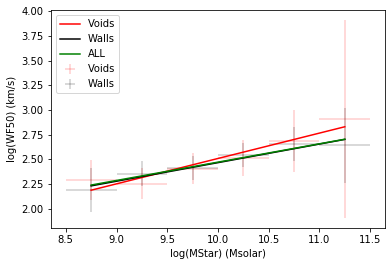

In [836]:
#log(W.WF50 velocity) = 0.19log(W.Stellar Mass) + 0.59
#log(V.WF50 velocity) = 0.26log(V.Stellar Mass) -0.06
#log(WF50 velocity) = 0.19log(Stellar Mass) + 0.62

plt.errorbar(voids_center, voids_wf50_median, xerr = voids_center_err, yerr = voids_wf50_median_err, fmt ='none', color = 'red', alpha = 0.2, label = 'Voids')
plt.errorbar(walls_center, walls_wf50_median, xerr = walls_center_err, yerr = walls_wf50_median_err, fmt ='none', color = 'black', alpha = 0.2, label = 'Walls')
plt.plot(x_data_voids_median, y_data_voids_median_line, '-r', label = 'Voids')
plt.plot(x_data_walls_median, y_data_walls_median_line, '-', color = 'black', label = 'Walls')
plt.plot(x_data_MStar_median, y_data_MStar_median_line, '-', color = 'green', label = 'ALL')
plt.xlabel('log(MStar) (Msolar)')
plt.ylabel('log(WF50) (km/s)')
plt.legend(loc = 'upper left')
plt.savefig('plots/log_WF50_corrected-log_MStar_MEDIANbestFit.svg', dpi=500, facecolor='w', edgecolor='w',
        orientation='portrait', format='svg', pad_inches=0.1)
plt.savefig('plots/log_WF50_corrected-log_MStar_MEDIANbestFit.jpeg', dpi=500, facecolor='w', edgecolor='w',
        orientation='portrait', format='jpeg', pad_inches=0.1)
plt.show()

***********************************************************



#### WF50 vs MHI




#### Binning HI masses

##### GBT

In [837]:
manga_logMHI_corr_pos = []
for i in range(len(mangaHI)):
    if mangaHI['logMHI_corrected'][i]>0:
        manga_logMHI_corr_pos.append(mangaHI['logMHI_corrected'][i])
print(min(manga_logMHI_corr_pos))
print(max(manga_logMHI_corr_pos))

7.0220037
10.539531


In [838]:
#manga_voids_MHI_bin1 = [] 
#manga_voids_MHI_bin2 = []
#manga_voids_MHI_bin3 = []
manga_voids_MHI_bin1 = []
manga_voids_MHI_bin2 = []
manga_voids_MHI_bin3 = []
manga_voids_MHI_bin4 = []
#manga_voids_MHI_bin8 = []

for i in range(len(mangaHI)):
    #if 7<=mangaHI['logMHI_corrected'][i]<=7.5 and mangaHI['Voids'][i]>0 and mangaHI['WF50_corrected'][i]>0:
     #   manga_voids_MHI_bin1.append(mangaHI['logMHI_corrected'][i])
    #if 7.5<mangaHI['logMHI_corrected'][i]<=8 and mangaHI['Voids'][i]>0 and mangaHI['WF50_corrected'][i]>0:
     #   manga_voids_MHI_bin2.append(mangaHI['logMHI_corrected'][i])
    #if 8<mangaHI['logMHI_corrected'][i]<=8.5 and mangaHI['Voids'][i]>0 and mangaHI['WF50_corrected'][i]>0:
     #   manga_voids_MHI_bin3.append(mangaHI['logMHI_corrected'][i])
    if 8.5<mangaHI['logMHI_corrected'][i]<=9 and mangaHI['Voids'][i]>0 and mangaHI['WF50_corrected'][i]>0:
        manga_voids_MHI_bin1.append(mangaHI['logMHI_corrected'][i])
    if 9<mangaHI['logMHI_corrected'][i]<=9.5 and mangaHI['Voids'][i]>0 and mangaHI['WF50_corrected'][i]>0:
        manga_voids_MHI_bin2.append(mangaHI['logMHI_corrected'][i])
    if 9.5<mangaHI['logMHI_corrected'][i]<=10 and mangaHI['Voids'][i]>0 and mangaHI['WF50_corrected'][i]>0:
        manga_voids_MHI_bin3.append(mangaHI['logMHI_corrected'][i])
    if 10<mangaHI['logMHI_corrected'][i]<=10.5 and mangaHI['Voids'][i]>0 and mangaHI['WF50_corrected'][i]>0:
        manga_voids_MHI_bin4.append(mangaHI['logMHI_corrected'][i])
    #if 10.5<mangaHI['logMHI_corrected'][i]<=11 and mangaHI['Voids'][i]>0 and mangaHI['WF50_corrected'][i]>0:
     #   manga_voids_MHI_bin8.append(mangaHI['logMHI_corrected'][i])
   

In [839]:
#manga_walls_MHI_bin1 = [] 
#manga_walls_MHI_bin2 = []
#manga_walls_MHI_bin3 = []
manga_walls_MHI_bin1 = []
manga_walls_MHI_bin2 = []
manga_walls_MHI_bin3 = []
manga_walls_MHI_bin4 = []
#manga_walls_MHI_bin8 = []

for i in range(len(mangaHI)):
    #if 7<=mangaHI['logMHI_corrected'][i]<=7.5 and mangaHI['Walls'][i]>0 and mangaHI['WF50_corrected'][i]>0:
     #   manga_walls_MHI_bin1.append(mangaHI['logMHI_corrected'][i])
    #if 7.5<mangaHI['logMHI_corrected'][i]<=8 and mangaHI['Walls'][i]>0 and mangaHI['WF50_corrected'][i]>0:
     #   manga_walls_MHI_bin2.append(mangaHI['logMHI_corrected'][i])
    #if 8<mangaHI['logMHI_corrected'][i]<=8.5 and mangaHI['Walls'][i]>0 and mangaHI['WF50_corrected'][i]>0:
     #   manga_walls_MHI_bin3.append(mangaHI['logMHI_corrected'][i])
    if 8.5<mangaHI['logMHI_corrected'][i]<=9 and mangaHI['Walls'][i]>0 and mangaHI['WF50_corrected'][i]>0:
        manga_walls_MHI_bin1.append(mangaHI['logMHI_corrected'][i])
    if 9<mangaHI['logMHI_corrected'][i]<=9.5 and mangaHI['Walls'][i]>0 and mangaHI['WF50_corrected'][i]>0:
        manga_walls_MHI_bin2.append(mangaHI['logMHI_corrected'][i])
    if 9.5<mangaHI['logMHI_corrected'][i]<=10 and mangaHI['Walls'][i]>0 and mangaHI['WF50_corrected'][i]>0:
        manga_walls_MHI_bin3.append(mangaHI['logMHI_corrected'][i])
    if 10<mangaHI['logMHI_corrected'][i]<=10.5 and mangaHI['Walls'][i]>0 and mangaHI['WF50_corrected'][i]>0:
        manga_walls_MHI_bin4.append(mangaHI['logMHI_corrected'][i])
    #if 10.5<mangaHI['logMHI_corrected'][i]<=11 and mangaHI['Walls'][i]>0 and mangaHI['WF50_corrected'][i]>0:
     #   manga_walls_MHI_bin8.append(mangaHI['logMHI_corrected'][i])
   

##### ALFALFA

In [840]:
alfa_logMHI_corr_pos = []
for i in range(len(alfaHI)):
    if alfaHI['logMHI_corrected'][i]>0:
        alfa_logMHI_corr_pos.append(alfaHI['logMHI_corrected'][i])
print(min(alfa_logMHI_corr_pos))
print(max(alfa_logMHI_corr_pos))

7.2555223
10.737423


In [841]:
#alfa_voids_MHI_bin1 = [] 
#alfa_voids_MHI_bin2 = []
#alfa_voids_MHI_bin3 = []
alfa_voids_MHI_bin1 = []
alfa_voids_MHI_bin2 = []
alfa_voids_MHI_bin3 = []
alfa_voids_MHI_bin4 = []
alfa_voids_MHI_bin5 = []

for i in range(len(alfaHI)):
    #if 7<=alfaHI['logMHI_corrected'][i]<=7.5 and alfaHI['Voids'][i]>0 and alfaHI['WF50_corrected'][i]>0:
      #  alfa_voids_MHI_bin1.append(alfaHI['logMHI_corrected'][i])
    #if 7.5<alfaHI['logMHI_corrected'][i]<=8 and alfaHI['Voids'][i]>0 and alfaHI['WF50_corrected'][i]>0:
      #  alfa_voids_MHI_bin2.append(alfaHI['logMHI_corrected'][i])
    #if 8<alfaHI['logMHI_corrected'][i]<=8.5 and alfaHI['Voids'][i]>0 and alfaHI['WF50_corrected'][i]>0:
     #   alfa_voids_MHI_bin3.append(alfaHI['logMHI_corrected'][i])
    if 8.5<alfaHI['logMHI_corrected'][i]<=9 and alfaHI['Voids'][i]>0 and alfaHI['WF50_corrected'][i]>0:
        alfa_voids_MHI_bin1.append(alfaHI['logMHI_corrected'][i])
    if 9<alfaHI['logMHI_corrected'][i]<=9.5 and alfaHI['Voids'][i]>0 and alfaHI['WF50_corrected'][i]>0:
        alfa_voids_MHI_bin2.append(alfaHI['logMHI_corrected'][i])
    if 9.5<alfaHI['logMHI_corrected'][i]<=10 and alfaHI['Voids'][i]>0 and alfaHI['WF50_corrected'][i]>0:
        alfa_voids_MHI_bin3.append(alfaHI['logMHI_corrected'][i])
    if 10<alfaHI['logMHI_corrected'][i]<=10.5 and alfaHI['Voids'][i]>0 and alfaHI['WF50_corrected'][i]>0:
        alfa_voids_MHI_bin4.append(alfaHI['logMHI_corrected'][i])
    if 10.5<alfaHI['logMHI_corrected'][i]<=11 and alfaHI['Voids'][i]>0 and alfaHI['WF50_corrected'][i]>0:
        alfa_voids_MHI_bin5.append(alfaHI['logMHI_corrected'][i])
   

In [842]:
#alfa_walls_MHI_bin1 = [] 
#alfa_walls_MHI_bin2 = []
#alfa_walls_MHI_bin3 = []
alfa_walls_MHI_bin1 = []
alfa_walls_MHI_bin2 = []
alfa_walls_MHI_bin3 = []
alfa_walls_MHI_bin4 = []
alfa_walls_MHI_bin5 = []

for i in range(len(alfaHI)):
    #if 7<=alfaHI['logMHI_corrected'][i]<=7.5 and alfaHI['Walls'][i]>0 and alfaHI['WF50_corrected'][i]>0:
     #   alfa_walls_MHI_bin1.append(alfaHI['logMHI_corrected'][i])
    #if 7.5<alfaHI['logMHI_corrected'][i]<=8 and alfaHI['Walls'][i]>0 and alfaHI['WF50_corrected'][i]>0:
     #   alfa_walls_MHI_bin2.append(alfaHI['logMHI_corrected'][i])
    #if 8<alfaHI['logMHI_corrected'][i]<=8.5 and alfaHI['Walls'][i]>0 and alfaHI['WF50_corrected'][i]>0:
     #   alfa_walls_MHI_bin3.append(alfaHI['logMHI_corrected'][i])
    if 8.5<alfaHI['logMHI_corrected'][i]<=9 and alfaHI['Walls'][i]>0 and alfaHI['WF50_corrected'][i]>0:
        alfa_walls_MHI_bin1.append(alfaHI['logMHI_corrected'][i])
    if 9<alfaHI['logMHI_corrected'][i]<=9.5 and alfaHI['Walls'][i]>0 and alfaHI['WF50_corrected'][i]>0:
        alfa_walls_MHI_bin2.append(alfaHI['logMHI_corrected'][i])
    if 9.5<alfaHI['logMHI_corrected'][i]<=10 and alfaHI['Walls'][i]>0 and alfaHI['WF50_corrected'][i]>0:
        alfa_walls_MHI_bin3.append(alfaHI['logMHI_corrected'][i])
    if 10<alfaHI['logMHI_corrected'][i]<=10.5 and alfaHI['Walls'][i]>0 and alfaHI['WF50_corrected'][i]>0:
        alfa_walls_MHI_bin4.append(alfaHI['logMHI_corrected'][i])
    if 10.5<alfaHI['logMHI_corrected'][i]<=11 and alfaHI['Walls'][i]>0 and alfaHI['WF50_corrected'][i]>0:
        alfa_walls_MHI_bin5.append(alfaHI['logMHI_corrected'][i])
   

##### Median WF50 

##### GBT

In [843]:
manga_voids_wf50_MHI_bin1 = []
manga_voids_wf50_MHI_bin2 = []
manga_voids_wf50_MHI_bin3 = []
manga_voids_wf50_MHI_bin4 = []



for i in range(len(mangaHI)):
    for a in range(len(manga_voids_MHI_bin1)):
        if manga_voids_MHI_bin1[a] == mangaHI['logMHI_corrected'][i]:
            manga_voids_wf50_MHI_bin1.append(mangaHI['WF50_corrected'][i])
    for b in range(len(manga_voids_MHI_bin2)):
        if manga_voids_MHI_bin2[b] == mangaHI['logMHI_corrected'][i]:
            manga_voids_wf50_MHI_bin2.append(mangaHI['WF50_corrected'][i])
    for c in range(len(manga_voids_MHI_bin3)):
        if manga_voids_MHI_bin3[c] == mangaHI['logMHI_corrected'][i]:
            manga_voids_wf50_MHI_bin3.append(mangaHI['WF50_corrected'][i])
    for d in range(len(manga_voids_MHI_bin4)):
        if manga_voids_MHI_bin4[d] == mangaHI['logMHI_corrected'][i]:
            manga_voids_wf50_MHI_bin4.append(mangaHI['WF50_corrected'][i])

manga_voids_wf50_MHI_median_bin1 = np.median(manga_voids_wf50_MHI_bin1)
manga_voids_wf50_MHI_median_bin2 = np.median(manga_voids_wf50_MHI_bin2)
manga_voids_wf50_MHI_median_bin3 = np.median(manga_voids_wf50_MHI_bin3)
manga_voids_wf50_MHI_median_bin4 = np.median(manga_voids_wf50_MHI_bin4)

            
manga_voids_wf50_bin1_MHI_err = 1/np.sqrt(len(manga_voids_wf50_MHI_bin1))    
manga_voids_wf50_bin2_MHI_err = 1/np.sqrt(len(manga_voids_wf50_MHI_bin2))    
manga_voids_wf50_bin3_MHI_err = 1/np.sqrt(len(manga_voids_wf50_MHI_bin3))    
manga_voids_wf50_bin4_MHI_err = 1/np.sqrt(len(manga_voids_wf50_MHI_bin4))    


In [844]:
manga_walls_wf50_MHI_bin1 = []
manga_walls_wf50_MHI_bin2 = []
manga_walls_wf50_MHI_bin3 = []
manga_walls_wf50_MHI_bin4 = []



for i in range(len(mangaHI)):
    for a in range(len(manga_walls_MHI_bin1)):
        if manga_walls_MHI_bin1[a] == mangaHI['logMHI_corrected'][i]:
            manga_walls_wf50_MHI_bin1.append(mangaHI['WF50_corrected'][i])
    for b in range(len(manga_walls_MHI_bin2)):
        if manga_walls_MHI_bin2[b] == mangaHI['logMHI_corrected'][i]:
            manga_walls_wf50_MHI_bin2.append(mangaHI['WF50_corrected'][i])
    for c in range(len(manga_walls_MHI_bin3)):
        if manga_walls_MHI_bin3[c] == mangaHI['logMHI_corrected'][i]:
            manga_walls_wf50_MHI_bin3.append(mangaHI['WF50_corrected'][i])
    for d in range(len(manga_walls_MHI_bin4)):
        if manga_walls_MHI_bin4[d] == mangaHI['logMHI_corrected'][i]:
            manga_walls_wf50_MHI_bin4.append(mangaHI['WF50_corrected'][i])

manga_walls_wf50_MHI_median_bin1 = np.median(manga_walls_wf50_MHI_bin1)
manga_walls_wf50_MHI_median_bin2 = np.median(manga_walls_wf50_MHI_bin2)
manga_walls_wf50_MHI_median_bin3 = np.median(manga_walls_wf50_MHI_bin3)
manga_walls_wf50_MHI_median_bin4 = np.median(manga_walls_wf50_MHI_bin4)

            
manga_walls_wf50_bin1_MHI_err = 1/np.sqrt(len(manga_walls_wf50_MHI_bin1))    
manga_walls_wf50_bin2_MHI_err = 1/np.sqrt(len(manga_walls_wf50_MHI_bin2))    
manga_walls_wf50_bin3_MHI_err = 1/np.sqrt(len(manga_walls_wf50_MHI_bin3))    
manga_walls_wf50_bin4_MHI_err = 1/np.sqrt(len(manga_walls_wf50_MHI_bin4))


##### ALFALFA

In [845]:
alfa_voids_wf50_MHI_bin1 = []
alfa_voids_wf50_MHI_bin2 = []
alfa_voids_wf50_MHI_bin3 = []
alfa_voids_wf50_MHI_bin4 = []
alfa_voids_wf50_MHI_bin5 = []


for i in range(len(alfaHI)):
    for a in range(len(alfa_voids_MHI_bin1)):
        if alfa_voids_MHI_bin1[a] == alfaHI['logMHI_corrected'][i]:
            alfa_voids_wf50_MHI_bin1.append(alfaHI['WF50_corrected'][i])
    for b in range(len(alfa_voids_MHI_bin2)):
        if alfa_voids_MHI_bin2[b] == alfaHI['logMHI_corrected'][i]:
            alfa_voids_wf50_MHI_bin2.append(alfaHI['WF50_corrected'][i])
    for c in range(len(alfa_voids_MHI_bin3)):
        if alfa_voids_MHI_bin3[c] == alfaHI['logMHI_corrected'][i]:
            alfa_voids_wf50_MHI_bin3.append(alfaHI['WF50_corrected'][i])
    for d in range(len(alfa_voids_MHI_bin4)):
        if alfa_voids_MHI_bin4[d] == alfaHI['logMHI_corrected'][i]:
            alfa_voids_wf50_MHI_bin4.append(alfaHI['WF50_corrected'][i])
    for e in range(len(alfa_voids_MHI_bin5)):
        if alfa_voids_MHI_bin5[e] == alfaHI['logMHI_corrected'][i]:
            alfa_voids_wf50_MHI_bin5.append(alfaHI['WF50_corrected'][i])


alfa_voids_wf50_MHI_median_bin1 = np.median(alfa_voids_wf50_MHI_bin1)
alfa_voids_wf50_MHI_median_bin2 = np.median(alfa_voids_wf50_MHI_bin2)
alfa_voids_wf50_MHI_median_bin3 = np.median(alfa_voids_wf50_MHI_bin3)
alfa_voids_wf50_MHI_median_bin4 = np.median(alfa_voids_wf50_MHI_bin4)
alfa_voids_wf50_MHI_median_bin5 = np.median(alfa_voids_wf50_MHI_bin5)

            
alfa_voids_wf50_MHI_bin1_err = 1/np.sqrt(len(alfa_voids_wf50_MHI_bin1))    
alfa_voids_wf50_MHI_bin2_err = 1/np.sqrt(len(alfa_voids_wf50_MHI_bin2))    
alfa_voids_wf50_MHI_bin3_err = 1/np.sqrt(len(alfa_voids_wf50_MHI_bin3))    
alfa_voids_wf50_MHI_bin4_err = 1/np.sqrt(len(alfa_voids_wf50_MHI_bin4))    
alfa_voids_wf50_MHI_bin5_err = 1/np.sqrt(len(alfa_voids_wf50_MHI_bin5)) 



In [846]:
alfa_walls_wf50_MHI_bin1 = []
alfa_walls_wf50_MHI_bin2 = []
alfa_walls_wf50_MHI_bin3 = []
alfa_walls_wf50_MHI_bin4 = []
alfa_walls_wf50_MHI_bin5 = []


for i in range(len(alfaHI)):
    for a in range(len(alfa_walls_MHI_bin1)):
        if alfa_walls_MHI_bin1[a] == alfaHI['logMHI_corrected'][i]:
            alfa_walls_wf50_MHI_bin1.append(alfaHI['WF50_corrected'][i])
    for b in range(len(alfa_walls_MHI_bin2)):
        if alfa_walls_MHI_bin2[b] == alfaHI['logMHI_corrected'][i]:
            alfa_walls_wf50_MHI_bin2.append(alfaHI['WF50_corrected'][i])
    for c in range(len(alfa_walls_MHI_bin3)):
        if alfa_walls_MHI_bin3[c] == alfaHI['logMHI_corrected'][i]:
            alfa_walls_wf50_MHI_bin3.append(alfaHI['WF50_corrected'][i])
    for d in range(len(alfa_walls_MHI_bin4)):
        if alfa_walls_MHI_bin4[d] == alfaHI['logMHI_corrected'][i]:
            alfa_walls_wf50_MHI_bin4.append(alfaHI['WF50_corrected'][i])
    for e in range(len(alfa_walls_MHI_bin5)):
        if alfa_walls_MHI_bin5[e] == alfaHI['logMHI_corrected'][i]:
            alfa_walls_wf50_MHI_bin5.append(alfaHI['WF50_corrected'][i])


alfa_walls_wf50_MHI_median_bin1 = np.median(alfa_walls_wf50_MHI_bin1)
alfa_walls_wf50_MHI_median_bin2 = np.median(alfa_walls_wf50_MHI_bin2)
alfa_walls_wf50_MHI_median_bin3 = np.median(alfa_walls_wf50_MHI_bin3)
alfa_walls_wf50_MHI_median_bin4 = np.median(alfa_walls_wf50_MHI_bin4)
alfa_walls_wf50_MHI_median_bin5 = np.median(alfa_walls_wf50_MHI_bin5)

            
alfa_walls_wf50_MHI_bin1_err = 1/np.sqrt(len(alfa_walls_wf50_MHI_bin1))    
alfa_walls_wf50_MHI_bin2_err = 1/np.sqrt(len(alfa_walls_wf50_MHI_bin2))    
alfa_walls_wf50_MHI_bin3_err = 1/np.sqrt(len(alfa_walls_wf50_MHI_bin3))    
alfa_walls_wf50_MHI_bin4_err = 1/np.sqrt(len(alfa_walls_wf50_MHI_bin4))    
alfa_walls_wf50_MHI_bin5_err = 1/np.sqrt(len(alfa_walls_wf50_MHI_bin5)) 



##### CONCATENATION

In [847]:
#VELOCITIES WF50
voids_wf50_MHI_bin1 = manga_voids_wf50_MHI_bin1 + alfa_voids_wf50_MHI_bin1
voids_wf50_MHI_bin2 = manga_voids_wf50_MHI_bin2 + alfa_voids_wf50_MHI_bin2
voids_wf50_MHI_bin3 = manga_voids_wf50_MHI_bin3 + alfa_voids_wf50_MHI_bin3
voids_wf50_MHI_bin4 = manga_voids_wf50_MHI_bin4 + alfa_voids_wf50_MHI_bin4
voids_wf50_MHI_bin5 = alfa_voids_wf50_MHI_bin5

voids_wf50_MHI_median_bin1 = np.median(voids_wf50_MHI_bin1)
voids_wf50_MHI_median_bin2 = np.median(voids_wf50_MHI_bin2)
voids_wf50_MHI_median_bin3 = np.median(voids_wf50_MHI_bin3)
voids_wf50_MHI_median_bin4 = np.median(voids_wf50_MHI_bin4)
voids_wf50_MHI_median_bin5 = np.median(voids_wf50_MHI_bin5)


#
voids_wf50_median_MHI = np.log10([voids_wf50_MHI_median_bin1, voids_wf50_MHI_median_bin2, voids_wf50_MHI_median_bin3,voids_wf50_MHI_median_bin4, voids_wf50_MHI_median_bin5])
#           

voids_wf50_MHI_bin1_err = 1/np.sqrt(len(voids_wf50_MHI_bin1))    
voids_wf50_MHI_bin2_err = 1/np.sqrt(len(voids_wf50_MHI_bin2))    
voids_wf50_MHI_bin3_err = 1/np.sqrt(len(voids_wf50_MHI_bin3))    
voids_wf50_MHI_bin4_err = 1/np.sqrt(len(voids_wf50_MHI_bin4))    
voids_wf50_MHI_bin5_err = 1/np.sqrt(len(voids_wf50_MHI_bin5)) 


#
voids_wf50_median_MHI_err = [voids_wf50_MHI_bin1_err, voids_wf50_MHI_bin2_err, voids_wf50_MHI_bin3_err,voids_wf50_MHI_bin4_err,voids_wf50_MHI_bin5_err]
#


#MASSES
voids_MHI_bin1 = manga_voids_MHI_bin1 + alfa_voids_MHI_bin1
voids_MHI_bin2 = manga_voids_MHI_bin2 + alfa_voids_MHI_bin2
voids_MHI_bin3 = manga_voids_MHI_bin3 + alfa_voids_MHI_bin3
voids_MHI_bin4 = manga_voids_MHI_bin4 + alfa_voids_MHI_bin4
voids_MHI_bin5 = alfa_voids_MHI_bin5


#
voids_center_MHI = [8.75, 9.25, 9.75, 10.25, 10.75]
#

#
voids_center_MHI_err = [0.25, 0.25, 0.25, 0.25, 0.25]
#


In [848]:
#VELOCITIES WF50
walls_wf50_MHI_bin1 = manga_walls_wf50_MHI_bin1 + alfa_walls_wf50_MHI_bin1
walls_wf50_MHI_bin2 = manga_walls_wf50_MHI_bin2 + alfa_walls_wf50_MHI_bin2
walls_wf50_MHI_bin3 = manga_walls_wf50_MHI_bin3 + alfa_walls_wf50_MHI_bin3
walls_wf50_MHI_bin4 = manga_walls_wf50_MHI_bin4 + alfa_walls_wf50_MHI_bin4
walls_wf50_MHI_bin5 = alfa_walls_wf50_MHI_bin5

walls_wf50_MHI_median_bin1 = np.median(walls_wf50_MHI_bin1)
walls_wf50_MHI_median_bin2 = np.median(walls_wf50_MHI_bin2)
walls_wf50_MHI_median_bin3 = np.median(walls_wf50_MHI_bin3)
walls_wf50_MHI_median_bin4 = np.median(walls_wf50_MHI_bin4)
walls_wf50_MHI_median_bin5 = np.median(walls_wf50_MHI_bin5)


#
walls_wf50_median_MHI = np.log10([walls_wf50_MHI_median_bin1, walls_wf50_MHI_median_bin2, walls_wf50_MHI_median_bin3,walls_wf50_MHI_median_bin4, walls_wf50_MHI_median_bin5])
#           

walls_wf50_MHI_bin1_err = 1/np.sqrt(len(walls_wf50_MHI_bin1))    
walls_wf50_MHI_bin2_err = 1/np.sqrt(len(walls_wf50_MHI_bin2))    
walls_wf50_MHI_bin3_err = 1/np.sqrt(len(walls_wf50_MHI_bin3))    
walls_wf50_MHI_bin4_err = 1/np.sqrt(len(walls_wf50_MHI_bin4))    
walls_wf50_MHI_bin5_err = 1/np.sqrt(len(walls_wf50_MHI_bin5)) 


#
walls_wf50_median_MHI_err = [walls_wf50_MHI_bin1_err, walls_wf50_MHI_bin2_err, walls_wf50_MHI_bin3_err,walls_wf50_MHI_bin4_err,walls_wf50_MHI_bin5_err]
#


#MASSES
walls_MHI_bin1 = manga_walls_MHI_bin1 + alfa_walls_MHI_bin1
walls_MHI_bin2 = manga_walls_MHI_bin2 + alfa_walls_MHI_bin2
walls_MHI_bin3 = manga_walls_MHI_bin3 + alfa_walls_MHI_bin3
walls_MHI_bin4 = manga_walls_MHI_bin4 + alfa_walls_MHI_bin4
walls_MHI_bin5 = alfa_walls_MHI_bin5


#
walls_center_MHI = [8.75, 9.25, 9.75, 10.25, 10.75]
#

#
walls_center_MHI_err = [0.25, 0.25, 0.25, 0.25, 0.25]
#


##### BEST FITS

In [849]:
y_data_voids_MHI_median = voids_wf50_median_MHI
x_data_voids_MHI_median = np.asarray(voids_center_MHI, dtype=np.float64)

popt_voids_MHI_median, pcov_voids_MHI_median = curve_fit(h, x_data_voids_MHI_median, y_data_voids_MHI_median)
m_bf_voids_MHI_median, b_bf_voids_MHI_median = popt_voids_MHI_median
m_err_voids_MHI_median, b_err_voids_MHI_median = np.sqrt(np.diag(pcov_voids_MHI_median))
m_bf_voids_MHI_median_2 = round(m_bf_voids_MHI_median, 2)
b_bf_voids_MHI_median_2 = round(b_bf_voids_MHI_median, 2)
print('m_bf = ' + str(m_bf_voids_MHI_median) + ', b_bf = ' + str(b_bf_voids_MHI_median))
print('m_err = ' + str(m_err_voids_MHI_median) + ', b_err = ' + str(b_err_voids_MHI_median))


m_bf = 0.2608563727013598, b_bf = -0.12752109715710142
m_err = 0.028463792681255044, b_err = 0.2782508602108927


In [850]:
y_data_voids_MHI_median_line = m_bf_voids_MHI_median* x_data_voids_MHI_median + b_bf_voids_MHI_median
print('Best-fit line equation for void galaxies HI mass given by the equation: log(V.WF50 velocity) = ' + str(m_bf_voids_MHI_median_2) + 'log(V.HI Mass) + ' +  str(b_bf_voids_MHI_median_2))

Best-fit line equation for void galaxies HI mass given by the equation: log(V.WF50 velocity) = 0.26log(V.HI Mass) + -0.13


In [851]:
y_data_walls_MHI_median = walls_wf50_median_MHI
x_data_walls_MHI_median = np.asarray(walls_center_MHI, dtype=np.float64)

popt_walls_MHI_median, pcov_walls_MHI_median = curve_fit(h, x_data_walls_MHI_median, y_data_walls_MHI_median)
m_bf_walls_MHI_median, b_bf_walls_MHI_median = popt_walls_MHI_median
m_err_walls_MHI_median, b_err_walls_MHI_median = np.sqrt(np.diag(pcov_walls_MHI_median))
m_bf_walls_MHI_median_2 = round(m_bf_walls_MHI_median, 2)
b_bf_walls_MHI_median_2 = round(b_bf_walls_MHI_median, 2)
print('m_bf = ' + str(m_bf_walls_MHI_median) + ', b_bf = ' + str(b_bf_walls_MHI_median))
print('m_err = ' + str(m_err_walls_MHI_median) + ', b_err = ' + str(b_err_walls_MHI_median))


m_bf = 0.30664204622671465, b_bf = -0.564345276862217
m_err = 0.02681982706025038, b_err = 0.26218010447358847


In [852]:
y_data_walls_MHI_median_line = m_bf_walls_MHI_median* x_data_walls_MHI_median + b_bf_walls_MHI_median
print('Best-fit line equation for wall galaxies HI mass given by the equation: log(W.WF50 velocity) = ' + str(m_bf_walls_MHI_median_2) + 'log(W.HI Mass) + ' +  str(b_bf_walls_MHI_median_2))

Best-fit line equation for wall galaxies HI mass given by the equation: log(W.WF50 velocity) = 0.31log(W.HI Mass) + -0.56


##### ALL

In [853]:
wf50_MHI_bin1 = walls_wf50_MHI_bin1+voids_wf50_MHI_bin1
wf50_MHI_bin2 = walls_wf50_MHI_bin2+voids_wf50_MHI_bin2
wf50_MHI_bin3 = walls_wf50_MHI_bin3+voids_wf50_MHI_bin3
wf50_MHI_bin4 = walls_wf50_MHI_bin4+voids_wf50_MHI_bin4
wf50_MHI_bin5 = walls_wf50_MHI_bin5+voids_wf50_MHI_bin5

wf50_MHI_median = np.log10([np.median(wf50_MHI_bin1), np.median(wf50_MHI_bin2), np.median(wf50_MHI_bin3),np.median(wf50_MHI_bin4),np.median(wf50_MHI_bin5)])

MHI_center = [8.75, 9.25, 9.75, 10.25, 10.75]


In [854]:
y_data_MHI_median = wf50_MHI_median
x_data_MHI_median = np.asarray(MHI_center, dtype=np.float64)

popt_MHI_median, pcov_MHI_median = curve_fit(h, x_data_MHI_median, y_data_MHI_median)
m_bf_MHI_median, b_bf_MHI_median = popt_MHI_median
m_err_MHI_median, b_err_MHI_median = np.sqrt(np.diag(pcov_MHI_median))
m_bf_MHI_median_2 = round(m_bf_MHI_median, 2)
b_bf_MHI_median_2 = round(b_bf_MHI_median, 2)
print('m_bf = ' + str(m_bf_MHI_median) + ', b_bf = ' + str(b_bf_MHI_median))
print('m_err = ' + str(m_err_MHI_median) + ', b_err = ' + str(b_err_MHI_median))

m_bf = 0.2717310015611354, b_bf = -0.22976756404743637
m_err = 0.012801442951855233, b_err = 0.12514187166946708


In [855]:
y_data_MHI_median_line = m_bf_MHI_median* x_data_MHI_median + b_bf_MHI_median
print('Best-fit line equation for all galaxies HI-mass given by the equation: log(WF50 velocity) = ' + str(m_bf_MHI_median_2) + 'log(HI Mass) + ' +  str(b_bf_MHI_median_2))

Best-fit line equation for all galaxies HI-mass given by the equation: log(WF50 velocity) = 0.27log(HI Mass) + -0.23


##### PLOT

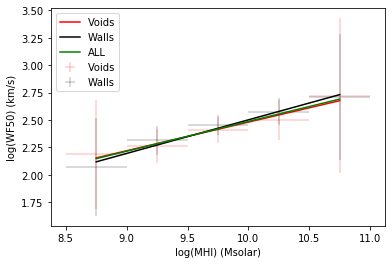

In [856]:
#log(W.WF50 velocity) = 0.31log(W.HI Mass) + -0.56
#log(V.WF50 velocity) = 0.26log(V.HI Mass) + -0.13
#log(WF50 velocity) = 0.27log(HI Mass) + -0.23


plt.errorbar(voids_center_MHI, voids_wf50_median_MHI, xerr = voids_center_MHI_err, yerr = voids_wf50_median_MHI_err, fmt ='none', color = 'red', alpha = 0.2, label = 'Voids')
plt.errorbar(walls_center_MHI, walls_wf50_median_MHI, xerr = walls_center_MHI_err, yerr = walls_wf50_median_MHI_err, fmt ='none', color = 'black', alpha = 0.2, label = 'Walls')
plt.plot(x_data_voids_MHI_median, y_data_voids_MHI_median_line, '-r', label = 'Voids')
plt.plot(x_data_walls_MHI_median, y_data_walls_MHI_median_line, '-', color = 'black', label = 'Walls')
plt.plot(x_data_MHI_median, y_data_MHI_median_line, '-', color = 'green', label = 'ALL')
plt.xlabel('log(MHI) (Msolar)')
plt.ylabel('log(WF50) (km/s)')
plt.legend(loc = 'upper left')
plt.savefig('plots/log_WF50_corrected-log_MHI_MEDIANbestFit.svg', dpi=500, facecolor='w', edgecolor='w',
        orientation='portrait', format='svg', pad_inches=0.1)
plt.savefig('plots/log_WF50_corrected-log_MHI_MEDIANbestFit.jpeg', dpi=500, facecolor='w', edgecolor='w',
        orientation='portrait', format='jpeg', pad_inches=0.1)
plt.show()

**QUESTIONS:**
1) For WF50 correction, I need a $\lambda$ value and a z value but I'm not sure how to get those. I don't think the paper has it but it does cite a paper which I don't really know how to find?
2) logWF50 vs logM* looks very different using the median method compared to the mean method which shows the slopes are identical within $1\sigma$ is there a reason why? I don't think I made any mistakes but I can check again

-----

### WF50 vs MHI+M*

##### Adding logMTotal columns

In [857]:
manga_logMTotal = []

for i in range(len(mangaHI)):
    if mangaHI['MTotal'][i] > 0:
        manga_logMTotal.append(np.log10(mangaHI['MTotal'][i]))
    else:
        manga_logMTotal.append(-999.0)

mangaHI.add_column(Column(np.asarray(manga_logMTotal, dtype = np.float32, order = 'F')), index = 17, name = 'logMTotal')

In [858]:
alfa_logMTotal = []

for i in range(len(alfaHI)):
    if alfaHI['MTotal'][i] > 0:
        alfa_logMTotal.append(np.log10(alfaHI['MTotal'][i]))
    else:
        alfa_logMTotal.append(-999.0)

alfaHI.add_column(Column(np.asarray(alfa_logMTotal, dtype = np.float32, order = 'F')), index = 17, name = 'logMTotal')

##### Binning masses

##### GBT

In [859]:
manga_logMTot_corr_pos = []
for i in range(len(mangaHI)):
    if mangaHI['logMTotal'][i]>0:
        manga_logMTot_corr_pos.append(mangaHI['logMTotal'][i])

alfa_logMTot_corr_pos = []
for i in range(len(alfaHI)):
    if alfaHI['logMTotal'][i]>0:
        alfa_logMTot_corr_pos.append(alfaHI['logMTotal'][i])

In [860]:
def round_down(x):
    rounded_x = round(x)
    if rounded_x > x: # 9.6 -> 10, so ans is 9.5
        x = rounded_x - 0.5
    elif rounded_x < x: # 9.4 -> 9, so ans is 9
        x = rounded_x
    return x

def round_up(x):
    rounded_x = round(x)
    if rounded_x > x: # 9.6 -> 10, so ans is 10
        x = rounded_x 
    elif rounded_x < x: # 9.4 -> 9, so ans is 9.5
        x = rounded_x + 0.5
    return x

In [861]:
def bin_mass(data, lower, upper, galaxyType):
    """
    fn: bin_mass()
    description: Returns a binned data structure according to log(mass)
    
    parameters:
        data: table of data, astropy table
        lower: min log(mass), float64
        upper: max log(mass), float64
        galaxyType: 'Voids'/'Walls', string
    
    return:
        bins: data structure containing binned data. bins is a list of lists. Each sublist corresponds
              to a bin.
    """
    bin_size = 0.5
   
    bins = []
    num_bins = int((upper - lower)/bin_size)
    for i in range(num_bins):
        bins.append([]) #generates empty sublists inside the list bins
    
    for i in range(len(data)):
        if data[galaxyType][i]>0 and data['WF50_corrected'][i]>0: # galaxy is a void and velocity > 0
            mass = data['logMTotal'][i]
            bin_num = int((mass - lower)//bin_size) # which bin to put into
            bins[bin_num].append(mass) # adds to corresponding bin
     
    return bins
            

In [862]:
alfa_lower_mass = round_down(min(alfa_logMTot_corr_pos))
alfa_upper_mass = round_up(max(alfa_logMTot_corr_pos))
manga_lower_mass = round_down(min(manga_logMTot_corr_pos))
manga_upper_mass = round_up(max(manga_logMTot_corr_pos))
lower_mass = min(alfa_lower_mass, manga_lower_mass)
upper_mass = max(alfa_upper_mass, manga_upper_mass)
manga_voids_MTotal_bins = bin_mass(mangaHI, lower_mass, upper_mass, 'Voids')

In [863]:
manga_walls_MTotal_bins = bin_mass(mangaHI, lower_mass, upper_mass, 'Walls')

##### ALFALFA

In [864]:

alfa_voids_MTotal_bins = bin_mass(alfaHI, lower_mass, upper_mass, 'Voids')
alfa_walls_MTotal_bins = bin_mass(alfaHI, lower_mass, upper_mass, 'Walls')

##### Median WF50

In [865]:
def bin_wf50(data, mass_bins):
    wf50_bins = []
    for _ in range(len(mass_bins)):
        wf50_bins.append([])
    #  loop through bins:
    #     find which row the mass is in
    #     add wf50 to corresponding bin from corresponding row
    
    
    for mass_bin in mass_bins:
        for mass in mass_bin:
            for i in range(len(data)):
                if mass == data['logMTotal'][i]:
                    wf50_bins[mass_bins.index(mass_bin)].append(np.log10(data['WF50_corrected'][i]))
    
    return wf50_bins
            
        

In [866]:
manga_voids_wf50_MTotal_bins = bin_wf50(mangaHI, manga_voids_MTotal_bins)
manga_walls_wf50_MTotal_bins = bin_wf50(mangaHI, manga_walls_MTotal_bins)
alfa_voids_wf50_MTotal_bins = bin_wf50(alfaHI, alfa_voids_MTotal_bins)
alfa_walls_wf50_MTotal_bins = bin_wf50(alfaHI, alfa_walls_MTotal_bins)

##### Concatenation

In [867]:
def concatenate_bins(bins_1, bins_2):
    concatenated_bins = []
    for i in range(len(bins_1)):
        concatenated_bins.append(bins_1[i] + bins_2[i])
    return concatenated_bins

In [868]:
def bin_midpoints(lower, upper):
    bin_size = 0.5
    bin_num = int((upper - lower)/bin_size)
    midpoints = []
    for i in range(bin_num):
        midpoints.append(lower + bin_size*(i + 0.5))
        # for every bin: midpoint = lower_bound_ofthatbin + bin_size/2
        # lower_bound_ofthatbin = lowest_bound + bin# * bin_size
        
    return midpoints

In [869]:
def bin_correction(l):
    while -999.0 in l:
        l.remove(-999.0)
    return l

In [870]:
#VELOCITIES WF50

voids_wf50_MTotal_bins = concatenate_bins(manga_voids_wf50_MTotal_bins, alfa_voids_wf50_MTotal_bins)

voids_wf50_MTotal_bins_medians = []
voids_wf50_MTotal_bins_medians_err = []

for wf50_bin in voids_wf50_MTotal_bins:
    if len(wf50_bin) < 2:
        voids_wf50_MTotal_bins_medians.append(-999.0)
        voids_wf50_MTotal_bins_medians_err.append(-999.0)
    else:
        voids_wf50_MTotal_bins_medians.append(np.median(wf50_bin))
        voids_wf50_MTotal_bins_medians_err.append(1/np.sqrt(len(wf50_bin)))



#
center_MTotal = bin_midpoints(lower_mass, upper_mass)
#

#
center_MTotal_err = 0.25
#

voids_wf50_MTotal_bins_medians = bin_correction(voids_wf50_MTotal_bins_medians)
voids_wf50_MTotal_bins_medians_err = bin_correction(voids_wf50_MTotal_bins_medians_err)
center_MTotal = center_MTotal[3:]

In [871]:
walls_wf50_MTotal_bins = concatenate_bins(manga_walls_wf50_MTotal_bins, alfa_walls_wf50_MTotal_bins)

walls_wf50_MTotal_bins_medians = []
walls_wf50_MTotal_bins_medians_err = []

for wf50_bin in walls_wf50_MTotal_bins:
    if len(wf50_bin) < 2:
        walls_wf50_MTotal_bins_medians.append(-999.0)
        walls_wf50_MTotal_bins_medians_err.append(-999.0)
    else:
        walls_wf50_MTotal_bins_medians.append(np.median(wf50_bin))
        walls_wf50_MTotal_bins_medians_err.append(1/np.sqrt(len(wf50_bin)))



walls_wf50_MTotal_bins_medians = bin_correction(walls_wf50_MTotal_bins_medians)
walls_wf50_MTotal_bins_medians_err = bin_correction(walls_wf50_MTotal_bins_medians_err)


##### BEST FITS

In [872]:
y_data_voids_MTotal_median = voids_wf50_MTotal_bins_medians
x_data_voids_MTotal_median = np.asarray(center_MTotal, dtype=np.float64)

popt_voids_MTotal_median, pcov_voids_MTotal_median = curve_fit(h, x_data_voids_MTotal_median, y_data_voids_MTotal_median)
m_bf_voids_MTotal_median, b_bf_voids_MTotal_median = popt_voids_MTotal_median
m_err_voids_MTotal_median, b_err_voids_MTotal_median = np.sqrt(np.diag(pcov_voids_MTotal_median))
m_bf_voids_MTotal_median_2 = round(m_bf_voids_MTotal_median, 2)
b_bf_voids_MTotal_median_2 = round(b_bf_voids_MTotal_median, 2)
print('m_bf = ' + str(m_bf_voids_MTotal_median) + ', b_bf = ' + str(b_bf_voids_MTotal_median))
print('m_err = ' + str(m_err_voids_MTotal_median) + ', b_err = ' + str(b_err_voids_MTotal_median))


m_bf = 0.2538968151785356, b_bf = -0.14847246348601417
m_err = 0.026528223174704102, b_err = 0.2725605243366176


In [873]:
y_data_voids_MTotal_median_line = m_bf_voids_MTotal_median* x_data_voids_MTotal_median + b_bf_voids_MTotal_median
print('Best-fit line equation for void galaxies MHI+M* given by the equation: log(V.WF50 velocity) = ' + str(m_bf_voids_MTotal_median_2) + 'log(V.HI Mass) + ' +  str(b_bf_voids_MTotal_median_2))


Best-fit line equation for void galaxies MHI+M* given by the equation: log(V.WF50 velocity) = 0.25log(V.HI Mass) + -0.15


In [874]:
y_data_walls_MTotal_median = walls_wf50_MTotal_bins_medians
x_data_walls_MTotal_median = np.asarray(center_MTotal, dtype=np.float64)

popt_walls_MTotal_median, pcov_walls_MTotal_median = curve_fit(h, x_data_walls_MTotal_median, y_data_walls_MTotal_median)
m_bf_walls_MTotal_median, b_bf_walls_MTotal_median = popt_walls_MTotal_median
m_err_walls_MTotal_median, b_err_walls_MTotal_median = np.sqrt(np.diag(pcov_walls_MTotal_median))
m_bf_walls_MTotal_median_2 = round(m_bf_walls_MTotal_median, 2)
b_bf_walls_MTotal_median_2 = round(b_bf_walls_MTotal_median, 2)
print('m_bf = ' + str(m_bf_walls_MTotal_median) + ', b_bf = ' + str(b_bf_walls_MTotal_median))
print('m_err = ' + str(m_err_walls_MTotal_median) + ', b_err = ' + str(b_err_walls_MTotal_median))


m_bf = 0.31003742357292796, b_bf = -0.745575551107333
m_err = 0.04845772098551815, b_err = 0.4978721252898861


In [875]:
y_data_walls_MTotal_median_line = m_bf_walls_MTotal_median* x_data_walls_MTotal_median + b_bf_walls_MTotal_median
print('Best-fit line equation for void galaxies MHI+M* given by the equation: log(W.WF50 velocity) = ' + str(m_bf_walls_MTotal_median_2) + 'log(W.HI Mass) + ' +  str(b_bf_walls_MTotal_median_2))


Best-fit line equation for void galaxies MHI+M* given by the equation: log(W.WF50 velocity) = 0.31log(W.HI Mass) + -0.75


##### ALL

In [876]:
wf50_MTotal_bins = concatenate_bins(voids_wf50_MTotal_bins[3:], walls_wf50_MTotal_bins[3:])

wf50_MTotal_bins_medians = []
for wf50_bin in wf50_MTotal_bins:
    wf50_MTotal_bins_medians.append(np.median(wf50_bin))

In [877]:
y_data_MTotal_median = wf50_MTotal_bins_medians
x_data_MTotal_median = np.asarray(center_MTotal, dtype=np.float64)

popt_MTotal_median, pcov_MTotal_median = curve_fit(h, x_data_MTotal_median, y_data_MTotal_median)
m_bf_MTotal_median, b_bf_MTotal_median = popt_MTotal_median
m_err_MTotal_median, b_err_MTotal_median = np.sqrt(np.diag(pcov_MTotal_median))
m_bf_MTotal_median_2 = round(m_bf_MTotal_median, 2)
b_bf_MTotal_median_2 = round(b_bf_MTotal_median, 2)
print('m_bf = ' + str(m_bf_MTotal_median) + ', b_bf = ' + str(b_bf_MTotal_median))
print('m_err = ' + str(m_err_MTotal_median) + ', b_err = ' + str(b_err_MTotal_median))


m_bf = 0.2731392652895056, b_bf = -0.355749025663491
m_err = 0.019470853046015337, b_err = 0.2000505794671614


In [878]:
y_data_MTotal_median_line = m_bf_MTotal_median* x_data_MTotal_median + b_bf_MTotal_median
print('Best-fit line equation for all galaxies MHI+M* given by the equation: log(WF50 velocity) = ' + str(m_bf_MTotal_median_2) + 'log(HI Mass) + ' +  str(b_bf_MTotal_median_2))


Best-fit line equation for all galaxies MHI+M* given by the equation: log(WF50 velocity) = 0.27log(HI Mass) + -0.36


##### PLOT


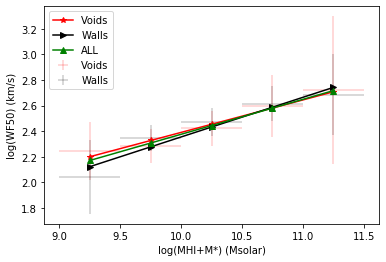

In [879]:
plt.errorbar(center_MTotal, voids_wf50_MTotal_bins_medians, xerr = center_MTotal_err, yerr = voids_wf50_MTotal_bins_medians_err, fmt ='none', color = 'red', alpha = 0.2, label = 'Voids')
plt.errorbar(center_MTotal, walls_wf50_MTotal_bins_medians, xerr = center_MTotal_err, yerr = walls_wf50_MTotal_bins_medians_err, fmt ='none', color = 'black', alpha = 0.2, label = 'Walls')
plt.plot(x_data_voids_MTotal_median, y_data_voids_MTotal_median_line, '-r*', label = 'Voids')
plt.plot(x_data_walls_MTotal_median, y_data_walls_MTotal_median_line, '->', color = 'black', label = 'Walls')
plt.plot(x_data_MTotal_median, y_data_MTotal_median_line, '-^', color = 'green', label = 'ALL')
plt.xlabel('log(MHI+M*) (Msolar)')
plt.ylabel('log(WF50) (km/s)')
plt.legend(loc = 'upper left')
plt.savefig('plots/log_WF50_corrected-log_MStar+HI_MEDIANbestFit.svg', dpi=500, facecolor='w', edgecolor='w',
        orientation='portrait', format='svg', pad_inches=0.1)
plt.savefig('plots/log_WF50_corrected-log_MStar+HI_MEDIANbestFit.jpeg', dpi=500, facecolor='w', edgecolor='w',
        orientation='portrait', format='jpeg', pad_inches=0.1)
plt.show()


---

In [880]:
kias7 = Table.read('input/kias1033_5_P-MJD-F_MPAJHU_ZdustOS_stellarMass_BPT_SFR_NSA_vflag.txt', format = 'ascii.commented_header')

In [881]:
kias7

index,ra,dec,redshift,Rgal,rabsmag,u_r,imc,aimc,cd,conx1,prmag,epetR,epetRc,iso_a,iso_b,abtrue,phi_iso_deg,vdisp,vdisperr,snmedian,rdev,ab_dev,rexp,ab_exp,mflag,mr,g_r,Ez,vflag,plate,MJD,fiberID,MPA_index,Mstar,BPTclass,flag3727,Z12logOH,Zerr,t3,N12logNH,NHerr,logNO,NOerr,sSFR,SFR,NUV_r,u_r_NSA,g_r_NSA,rabsmag_NSA,Mstar_NSA,Ne12logNeH,NeHerr,logNeO,NeOerr
float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int32,int32,int32,int32,int32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
749.0,38.049133,0.224026,0.054022,160.22,-20.101,2.755,1.0,1.0,-0.047,0.283,15.939,8.5,8.413,16.21,11.82,0.73,-80.52,223.27,6.29,33.68,2.434,0.807,1.536,0.833,0.0,16.139,0.952,160.223458454,9,407,51820,513,70459,10.55196475982666,5.0,nan,nan,nan,nan,nan,nan,nan,nan,-11.68909740447998,-1.0694656372070312,5.886381035385732,2.5909545388571527,0.8840782662723994,-20.536251068115234,22597765120.0,nan,nan,nan,nan
750.0,38.352528,0.212491,0.053818,159.62,-19.256,2.565,1.0,1.0,-0.02,0.365,16.786,5.89,5.848,8.51,7.74,0.91,-8.39,67.03,5.59,21.47,2.485,0.887,1.788,0.827,0.0,16.837,0.871,159.625013119,9,407,51820,594,70517,10.169575691223145,3.0,nan,nan,nan,nan,nan,nan,nan,nan,-11.156432151794434,-0.9351850748062134,inf,2.2251583317081285,0.7622379303778964,-19.708415985107422,10089863168.0,nan,nan,nan,nan
751.0,38.363598,0.210654,0.05405,160.31,-20.959,2.495,2.0,25.88,-0.297,0.417,15.09,13.78,13.704,25.21,10.3,0.41,-75.63,137.34,5.46,26.55,10.349,0.407,6.239,0.386,0.0,15.309,0.877,160.305594057,9,408,51821,351,70759,10.911660194396973,4.0,nan,nan,nan,nan,nan,nan,nan,nan,-10.782448768615723,0.17625018954277039,inf,2.1127458441288782,0.7120395549037929,-21.317277908325195,45481709568.0,nan,nan,nan,nan
761.0,54.936817,0.216794,0.201277,578.63,-21.711,2.88,1.0,1.0,0.034,0.323,17.361,5.02,4.906,8.83,7.48,0.85,-67.96,245.02,13.84,13.57,2.21,0.811,1.248,0.836,0.0,17.265,1.0,578.633830879,9,416,51811,472,78846,11.36347484588623,-1.0,nan,nan,nan,nan,nan,nan,nan,nan,-11.924013137817383,-0.517741858959198,nan,nan,nan,nan,nan,nan,nan,nan,nan
1009.0,54.534882,0.578615,0.128955,376.57,-20.604,2.767,1.0,1.0,-0.05,0.281,17.415,4.45,4.304,8.88,6.56,0.73,69.88,197.05,10.07,15.48,1.449,0.855,1.195,0.866,0.0,17.402,0.963,376.56649592,9,416,51811,385,78791,10.833581924438477,-1.0,nan,nan,nan,nan,nan,nan,nan,nan,-11.989643096923828,-1.1046427488327026,nan,nan,nan,nan,nan,nan,nan,nan,nan
1029.0,54.743076,0.508774,0.183435,529.41,-21.392,2.576,1.0,1.0,-0.026,0.313,17.453,4.11,3.951,8.53,7.38,0.86,76.4,232.49,13.07,13.31,1.669,1.0,0.988,0.984,0.0,17.427,0.994,529.408941519,9,416,51811,423,78820,11.235125541687012,-1.0,nan,nan,nan,nan,nan,nan,nan,nan,-11.931730270385742,-0.6697368025779724,nan,nan,nan,nan,nan,nan,nan,nan,nan
1037.0,54.867241,0.562636,0.139661,406.9,-20.776,2.936,1.0,1.0,-0.127,0.325,17.42,7.25,7.201,9.66,7.36,0.76,-1.13,173.33,14.65,11.04,2.552,0.633,1.299,0.664,0.0,17.464,0.925,406.901440565,9,416,51811,422,78819,10.913909912109375,2.0,nan,nan,nan,nan,nan,nan,nan,nan,-10.952052116394043,0.012539233081042767,nan,nan,nan,nan,nan,nan,nan,nan,nan
1041.0,54.856907,0.544031,0.139478,406.38,-20.961,2.775,1.0,1.0,-0.147,0.358,17.234,6.42,6.342,9.21,6.75,0.73,82.33,165.2,13.54,11.82,3.384,0.8,1.634,0.838,0.0,17.123,0.954,406.384142499,9,416,51811,428,78822,11.011194229125977,-1.0,nan,nan,nan,nan,nan,nan,nan,nan,-11.529818534851074,-0.47579777240753174,nan,nan,nan,nan,nan,nan,nan,nan,nan
1048.0,54.977749,0.501912,0.139322,405.94,-20.943,2.223,2.0,25.78,-0.163,0.43,17.242,4.97,4.768,7.5,5.4,0.71,-10.86,133.73,10.1,13.41,3.845,0.68,2.005,0.704,0.0,17.385,0.749,405.943133443,9,416,51811,469,78845,10.933839797973633,2.0,nan,nan,nan,nan,nan,nan,nan,nan,-10.561537742614746,0.4192074835300

In [882]:
#For every HI galaxy go through the kias table between HI galaxy and every kias galaxy

In [889]:
NSA_plate_manga = []
NSA_fiberID_manga = []
NSA_MJD_manga = []

for i in range(len(mangaHI)):
    for j in range(len(table2)):
        if mangaHI['Plate'][i] == table2['MaNGA_plate'][j] and mangaHI['IFU'][i] == table2['MaNGA_IFU'][j]:
            NSA_plate_manga.append(table2['NSA_plate'][j])
            NSA_fiberID_manga.append(table2['NSA_fiberID'][j])
            NSA_MJD_manga.append(table2['NSA_MJD'][j])

#mangaHI.remove_column('plate')
#mangaHI.remove_column('fiberID')
#mangaHI.remove_column('MJD')
mangaHI.add_column(Column(np.asarray(NSA_plate_manga, dtype=np.float64, order='F')), index = 2, name = 'plate')
mangaHI.add_column(Column(np.asarray(NSA_fiberID_manga, dtype=np.float64, order='F')), index = 3, name = 'fiberID')
mangaHI.add_column(Column(np.asarray(NSA_MJD_manga, dtype=np.float64, order='F')), index = 4, name = 'MJD')



In [892]:
NSA_plate_alfa = []
NSA_fiberID_alfa = []
NSA_MJD_alfa = []

for i in range(len(alfaHI)):
    for j in range(len(table2)):
        if alfaHI['Plate'][i] == table2['MaNGA_plate'][j] and alfaHI['IFU'][i] == table2['MaNGA_IFU'][j]:
            NSA_plate_alfa.append(table2['NSA_plate'][j])
            NSA_fiberID_alfa.append(table2['NSA_fiberID'][j])
            NSA_MJD_alfa.append(table2['NSA_MJD'][j])

#alfaHI.remove_column('plate')
#alfaHI.remove_column('fiberID')
#alfaHI.remove_column('MJD')
alfaHI.add_column(Column(np.asarray(NSA_plate_alfa, dtype=np.float64, order='F')), index = 2, name = 'plate')
alfaHI.add_column(Column(np.asarray(NSA_fiberID_alfa, dtype=np.float64, order='F')), index = 3, name = 'fiberID')
alfaHI.add_column(Column(np.asarray(NSA_MJD_alfa, dtype=np.float64, order='F')), index = 4, name = 'MJD')



In [886]:
# def min_distance(table1, table2, ra_1, dec_1, redshift_1, ra_2, dec_2, redshift_2):
   
#     c = 3*(10**8) #m/s
#     H = 2.43 * (10**-18) #1/s
   
#     distances = []
   
#     for i in range(len(table1)):
        
#     r_1 = c*redshift_1/H
#     x_1 = r_1 * np.cos(ra_1* np.pi/180) * np.cos(dec_1 * np.pi/180)
#     y_1 = r_1 * np.sin(ra_1* np.pi/180) * np.cos(dec_1 * np.pi/180)
#     z_1 = r_1 * np.sin(ra_1* np.pi/180)
    
#     r_2 = c*redshift_2/H
#     x_2 = r_2 * np.cos(ra_2* np.pi/180) * np.cos(dec_2 * np.pi/180)
#     y_2 = r_2 * np.sin(ra_2* np.pi/180) * np.cos(dec_2 * np.pi/180)
#     z_2 = r_2 * np.sin(ra_2* np.pi/180)
    
#     distance = np.sqrt((x_1-x_2)**2) + ((y_1-y_2)**2) + ((z_1-z_2)**2))
    
#     distance_Mpc = (distance) * (3.24 * 10**-17) * (10**-6)

min_distance = []  
x_1 = []
y_1 = []
z_1 = []
x_2 = []
y_2 = []
z_2 = []

c = 3*(10**8) #m/s
H = 2.43 * (10**-18) #1/s
   
for i in range(len(kias7)):
    radius_2 = c*kias7['redshift'][i]/H
    r_2 = radius_2
    x_2_cor = r_2 * np.cos(kias7['ra'][i]* np.pi/180) * np.cos(kias7['dec'][i]* np.pi/180)
    y_2_cor = r_2 * np.sin(kias7['ra'][i]* np.pi/180) * np.cos(kias7['dec'][i]* np.pi/180)
    z_2_cor = r_2 * np.sin(kias7['ra'][i]* np.pi/180)
    x_2.append(x_2_cor)
    y_2.append(y_2_cor)
    z_2.append(z_2_cor)
    
for j in range(len(mangaHI)):
    radius_1 = c*mangaHI['NSA_redshift'][j]/H
    r_1 = radius_1
    x_1_cor = r_1 * np.cos(mangaHI['objra'][j]* np.pi/180) * np.cos(mangaHI['objdec'][j]* np.pi/180)
    y_1_cor = r_1 * np.sin(mangaHI['objra'][j]* np.pi/180) * np.cos(mangaHI['objdec'][j]* np.pi/180)
    z_1_cor = r_1 * np.sin(mangaHI['objra'][j]* np.pi/180)
    x_1.append(x_1_cor)
    y_1.append(y_1_cor)
    z_1.append(z_1_cor)

 

In [ ]:
for k in range(len(mangaHI)):
    for l in range(len(kias7)):
        minimum = 1000
        distance = np.sqrt((x_1[k]-x_2[k])**2 + (y_1[k]-y_2[l])**2 + (z_1[k]-z_2[l])**2) * (3.24 * 10**-17) * (10**-6)
        if (mangaHI['plate'][k], mangaHI['fiberID'][k], mangaHI['MJD'][k]) != (kias7['plate'][l], kias7['fiberID'][l], kias7['MJD'][l]):
            if distance < minimum:
                minimum = distance
    min_distance.append(minimum)         
 

